Problem Statement - I
Introduction
This assignment aims to give you an idea of applying EDA in a real business scenario. In this assignment, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.<br>

Business Understanding
The loan-providing companies find it hard to give loans to people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter. Suppose you work for a consumer finance company specialising in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.<br>

 When the company receives a loan application, the company has to decide on loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:<br>

    If the applicant is likely to repay the loan, then not approving the loan results in a loss of business for the company.
    If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.<br>

The data given below contains information about the loan application at the time of applying for the loan. It contains two types of scenarios:<br>

    The client with payment difficulties: he/she had a late payment of more than X days on at least one of the first Y instalments of the loan in our sample,
    All other cases: All other cases when the payment is paid on time.<br>
 
When a client applies for a loan, there are four types of decisions that could be taken by the client/company):<br>

    -Approved: The company has approved the loan application
    -Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client, he received worse pricing which he did not want.
    -Refused: The company had rejected the loan (because the client does not meet their requirements etc.).
    -Unused offer: The loan has been cancelled by the client but at different stages of the process.

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the dataset 'applicationdata' using dataframe
df= pd.read_csv("applicationdata.csv")
#displaying the first 5 records of dataframe
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#checking info of the dataframe
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [5]:
#checking the datatype of each field in df
df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

## Data Cleaning 

In [3]:
#large dataframes can be seen in output wholely
pd.set_option("display.max_rows", None)
#checking the percentage of missing values in each column
df.isnull().sum()/len(df)*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [4]:
#checking columns having null value than 50%
col= df.isnull().sum()/len(df)*100
col= col[col.values>50]
print(len(col))

41


**INSIGHT**:<br> 
 1. There are 41 columns in dataset having null values more than 50% which are related to different area sizes on apartment owned/rentedby the applicants.

In [5]:
#dropping the columns having null values greater than 50%
col= list(col[col.values>50].index)
df.drop(labels=col, axis=1, inplace=True)
print(len(col))

41


In [14]:
df.shape

(307511, 81)

In [6]:
#checking the columns having null values
pd.set_option("display.max_rows", None)
df.isnull().sum()/len(df)*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0

 2. After dropping null values columns greater than 50%. Now, we are having some null values in columns(these are less than 50%)

###### Analyzing the columns having values less than 15%

In [7]:
col=df.isnull().sum()/len(df)*100
col= col[col.values<15]
print(col)
len(col)

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

71

**1. Analysis of AMT_ANNUITY column**

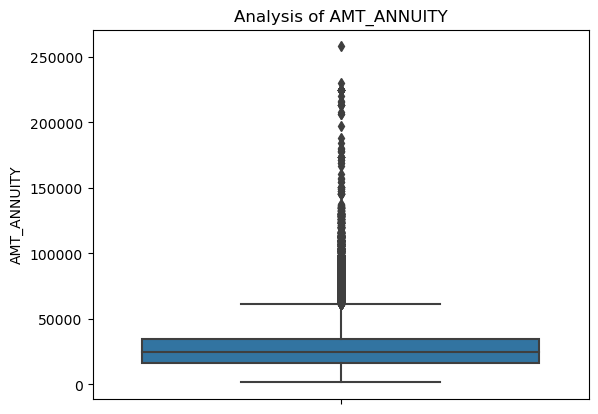

In [13]:
#plotting the values of AMT_ANNUITY column to detect using boxplot.
sns.boxplot(y=df["AMT_ANNUITY"])
plt.title("Analysis of AMT_ANNUITY")
plt.show()

 3. From boxplot we can see there are many outliers. So, we will check for the max and min, if the difference is quite severe. We will replace the null values with the median value.

In [14]:
#describing the info of AMT_ANNUITY column
print(df["AMT_ANNUITY"].mean())
print(df["AMT_ANNUITY"].median())
print(df["AMT_ANNUITY"].describe())

27108.573909183444
24903.0
count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


In [15]:
df.AMT_ANNUITY.isnull().sum()

12

In [16]:
fill= df['AMT_ANNUITY'].median()
df["AMT_ANNUITY"].fillna(value= fill, inplace= True)

In [17]:
#checking for the null values in AMT_ANNUITY column
df.AMT_ANNUITY.isnull().sum()

0

** Now AMT_ANNUITY column has no null value

**2. Analysis of CNT_FAM_MEMBERS column**

In [18]:
#checking the count of family members
df["CNT_FAM_MEMBERS"].value_counts(dropna= False)

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
NaN          2
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

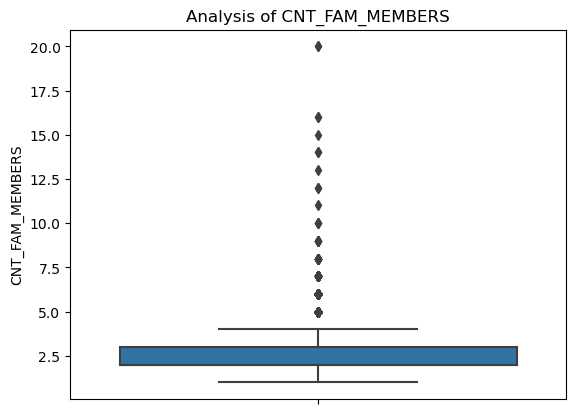

In [19]:
#plotting the boxplot to detect outliers in CNT_FAM_MEMBERS column
sns.boxplot(y=df["CNT_FAM_MEMBERS"])
plt.title("Analysis of CNT_FAM_MEMBERS")
plt.show()

In [20]:
#checking the information of CNT_FAM_MEMBERS column
print(df["CNT_FAM_MEMBERS"].mean())
print(df["CNT_FAM_MEMBERS"].median())
print(df["CNT_FAM_MEMBERS"].describe())

2.152665450442101
2.0
count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64


**INSIGHT:**
1. From boxplot we can see that there are many outliers and there is a big difference between min, 75% and max.
2. So, we will replace those null values with median.

In [21]:
# filling the missing values with median
fill= df["CNT_FAM_MEMBERS"].median()
df["CNT_FAM_MEMBERS"].fillna(value= fill, inplace=True)

In [22]:
#checking for missing value in CNT_FAM_MEMBERS column
df.CNT_FAM_MEMBERS.isnull().sum()

0

**3. Analysis of Code_Gender**

In [23]:
#checking the count of the gender(Male and Female)
df["CODE_GENDER"].value_counts(dropna= False)

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

**Insights:**
1. We can see that the female(F) is in majority in CODE_GENDER and 4 rows are having XNA values.
2. We will update these 4 rows with F, and it won't affect the dataset. 

In [24]:
#replacing the XNA with F
df.loc[df["CODE_GENDER"]=="XNA","CODE_GENDER"]="F"
df["CODE_GENDER"].value_counts(dropna= False)

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

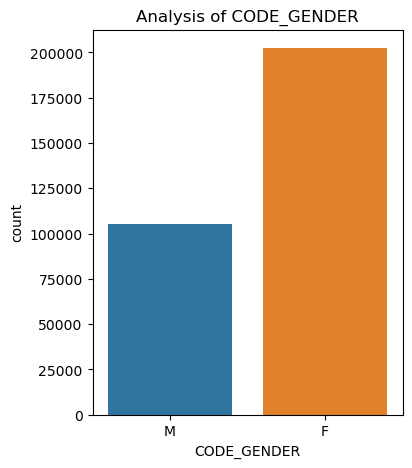

In [25]:
#plotting bargraph for CODE_GENDER
plt.figure(figsize=(4,5))
sns.countplot(data=df, x="CODE_GENDER")
plt.title("Analysis of CODE_GENDER")
plt.show()

**4. Analysis of ORGANIZATION_TYPE**

In [26]:
#checking the count of each type of organization where clients work
df["ORGANIZATION_TYPE"].value_counts(dropna=False)

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

**Insight:**
1. While analyzing the ORGANIZATION_TYPE we found XNA having the value of 55374.

In [27]:
#checking the information of ORGANIZATION_TYPE
print(df["ORGANIZATION_TYPE"].mode())
print(df["ORGANIZATION_TYPE"].describe())

0    Business Entity Type 3
Name: ORGANIZATION_TYPE, dtype: object
count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object


2. XNA is 18% of total count so we can discard them.

**5. Analysis of AMT_GOODS_PRICE**

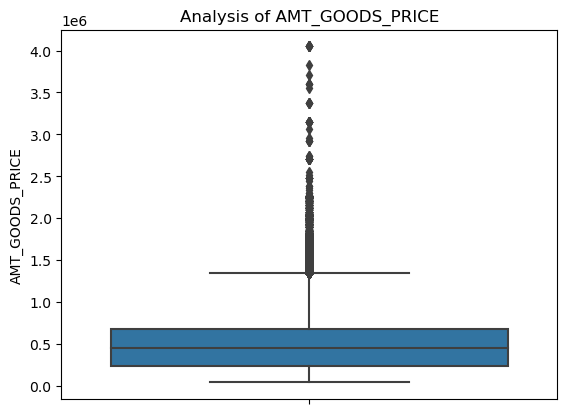

In [28]:
#we will create a boxplot to check the outliers in AMT_GOODS_PRICE
sns.boxplot(y=df["AMT_GOODS_PRICE"])
plt.title("Analysis of AMT_GOODS_PRICE")
plt.show()

In [29]:
#checking the mean, median, and info AMT_GOODS_PRICE
print(df["AMT_GOODS_PRICE"].mean())
print(df["AMT_GOODS_PRICE"].median())
print(df["AMT_GOODS_PRICE"].describe())

538396.2074288895
450000.0
count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


**Insights:**
1. Due to large size of data we are not getting clear understanding of the data, so we would keep the null values.

**6. Analysis of AMT_REQ_CREDIT_BUREAU_DAY**

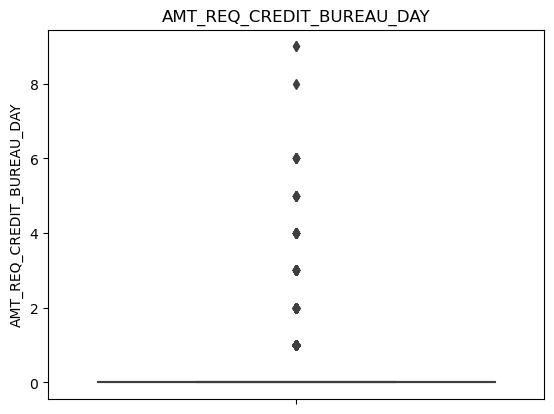

In [30]:
#we will create the boxplot to check the outliers in AMT_REQ_CREDIT_BUREAU_DAY
sns.boxplot(y=df["AMT_REQ_CREDIT_BUREAU_DAY"])
plt.title("AMT_REQ_CREDIT_BUREAU_DAY")
plt.show()

In [31]:
#checking the mean,median and info of AMT_REQ_CREDIT_BUREAU_DAY
print(df["AMT_REQ_CREDIT_BUREAU_DAY"].mean())
print(df["AMT_REQ_CREDIT_BUREAU_DAY"].median())
print(df["AMT_REQ_CREDIT_BUREAU_DAY"].describe())

0.0070002105326475985
0.0
count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64


**Insights:**
1. There are outliers in AMT_REQ_CREDIT_BUREAU_DAY column, so we will fill the missing values using median.

In [32]:
#removing the outliers in AMT_REQ_CREDIT_BUREAU_DAY
outliers=["AMT_REQ_CREDIT_BUREAU_DAY"]
for i in outliers:
    percentiles=df[i].quantile([0.01,0.99]).values
    df[i][df[i]<=percentiles[0]]=percentiles[0]
    df[i][df[i]>=percentiles[1]]=percentiles[1]

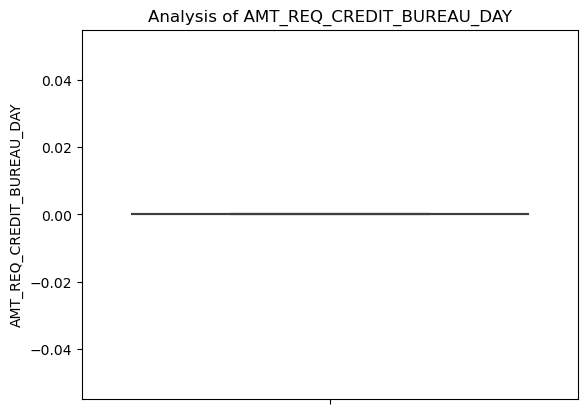

In [33]:
#now checking the outliers using boxplot of AMT_REQ_CREDIT_BUREAU_DAY
sns.boxplot(y=df["AMT_REQ_CREDIT_BUREAU_DAY"])
plt.title("Analysis of AMT_REQ_CREDIT_BUREAU_DAY")
plt.show()

### **Changing the datatype**

In [34]:
df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


In [35]:
#changing all variables in number datatypes
numbercol=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY']
df[numbercol]=df[numbercol].apply(pd.to_numeric)
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


**Univariate Analysis for Categories**

In [36]:
#bins for income amount
bins= [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot= ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

df["AMT_INCOME_RANGE"]=pd.cut(df["AMT_INCOME_TOTAL"],bins, labels=slot)

In [37]:
#bins for credit amount
bins= [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots= ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

df["AMT_CREDIT_RANGE"]= pd.cut(df["AMT_CREDIT"], bins=bins, labels=slots)

In [38]:
#dividing the dataset into two dataset 1. Target0(Non-defaulters), 2. Target1(defaulters)
target0= df.loc[df["TARGET"]==0]
target1=df.loc[df["TARGET"]==1]
#imbalance percentage
imbalance = round(len(target0)/len(target1),2)
imbalance 

11.39

In [39]:
#creating function so we can easily plot charts
def chart(df,col, title,hue=None):
    sns.set_style("darkgrid")
    sns.set_context("poster")
    temp=pd.Series(data=hue)
    fig,ax= plt.subplots()
    width=len(df[col].unique())+7+4*len(temp.unique())
    fig.set_size_inches(width, 8)
    plt.title(title)
    ax= sns.countplot(data=df, x=col, hue=hue, palette="bright")
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    plt.show()

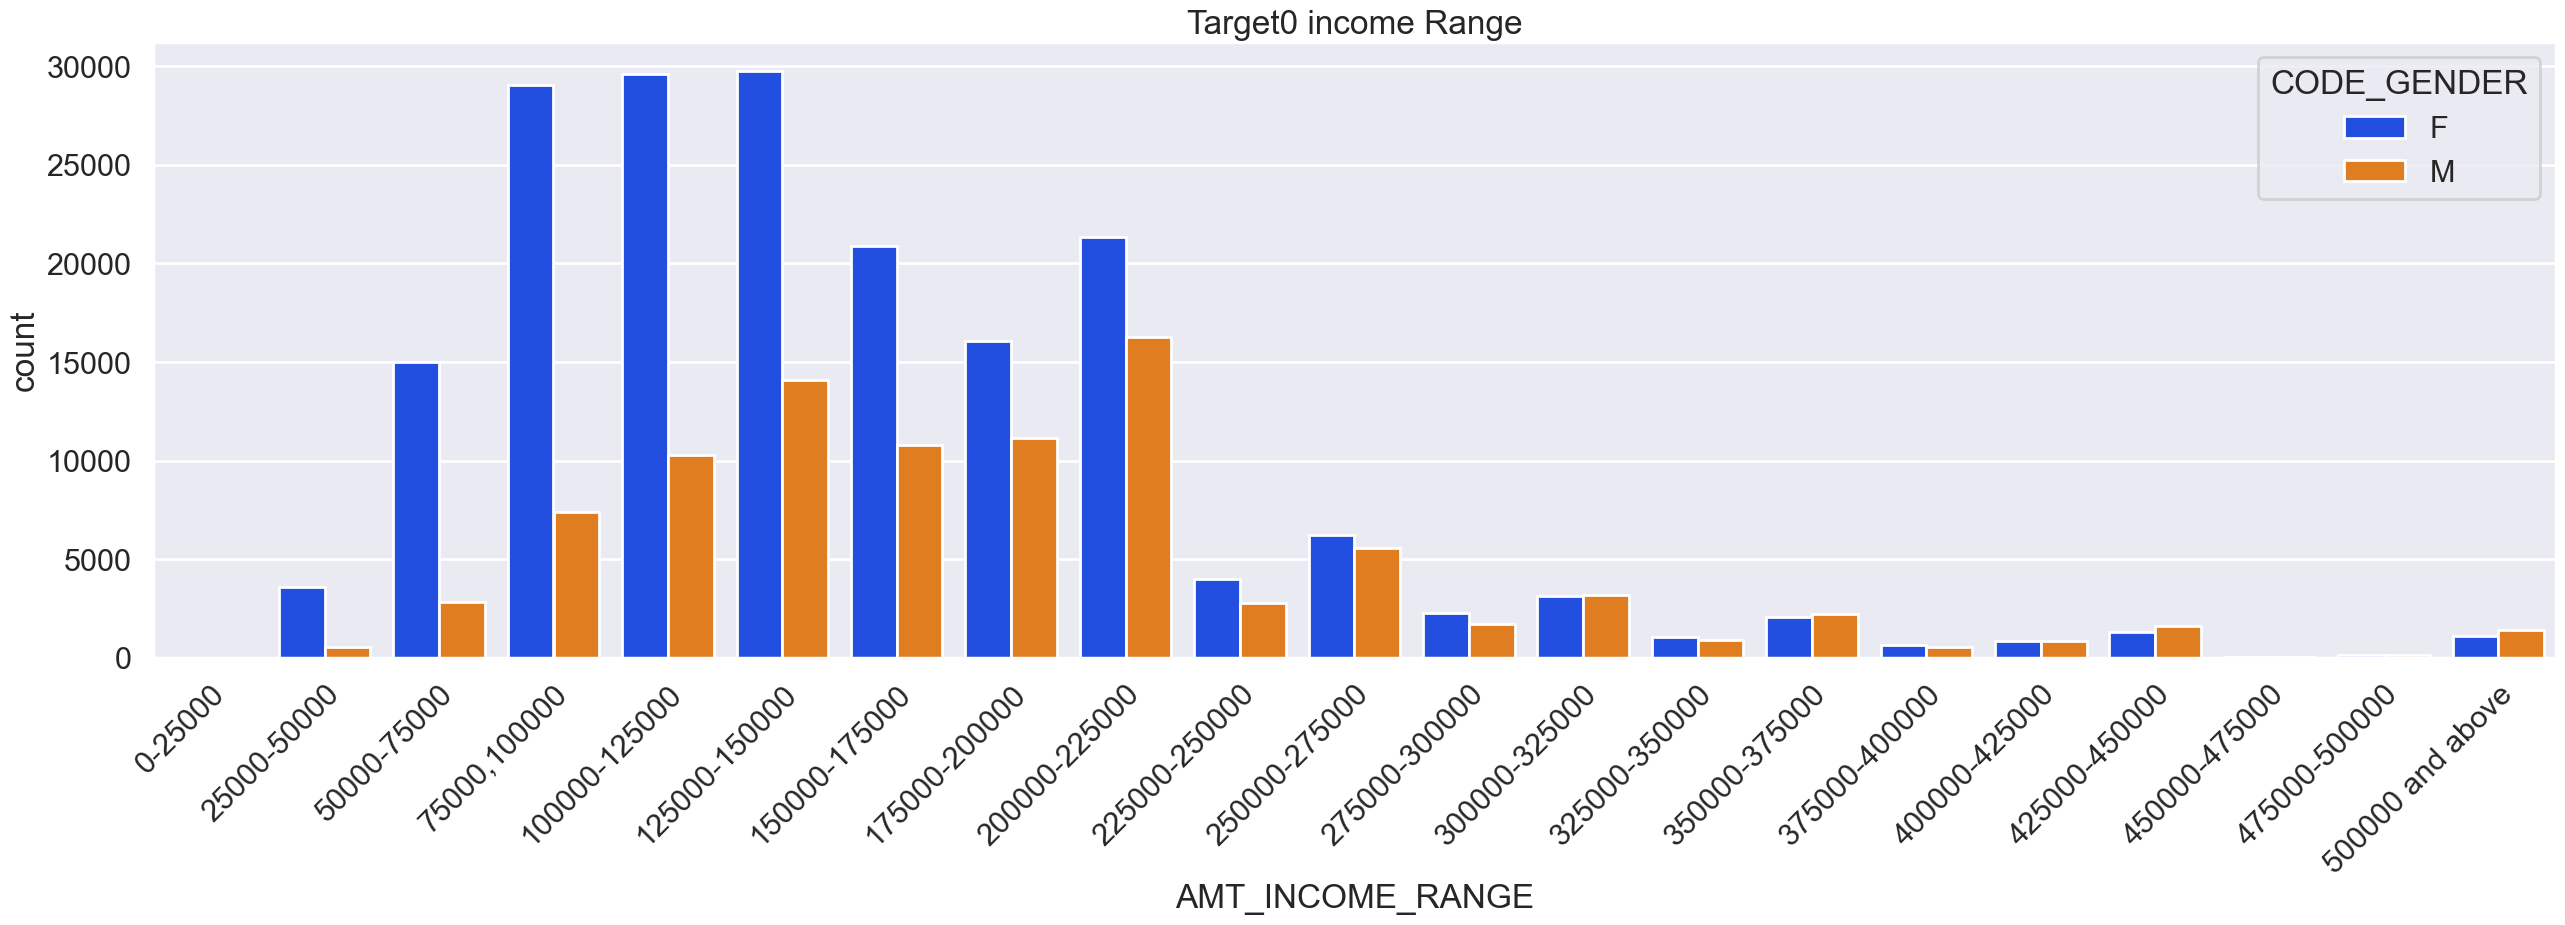

In [40]:
#plotting for target0
chart(target0, col="AMT_INCOME_RANGE", title="Target0 income Range", hue="CODE_GENDER")

**Insights:**
1. Above graph is based on the income range of non-defaulters.
2. Females counts are more as compare to male.

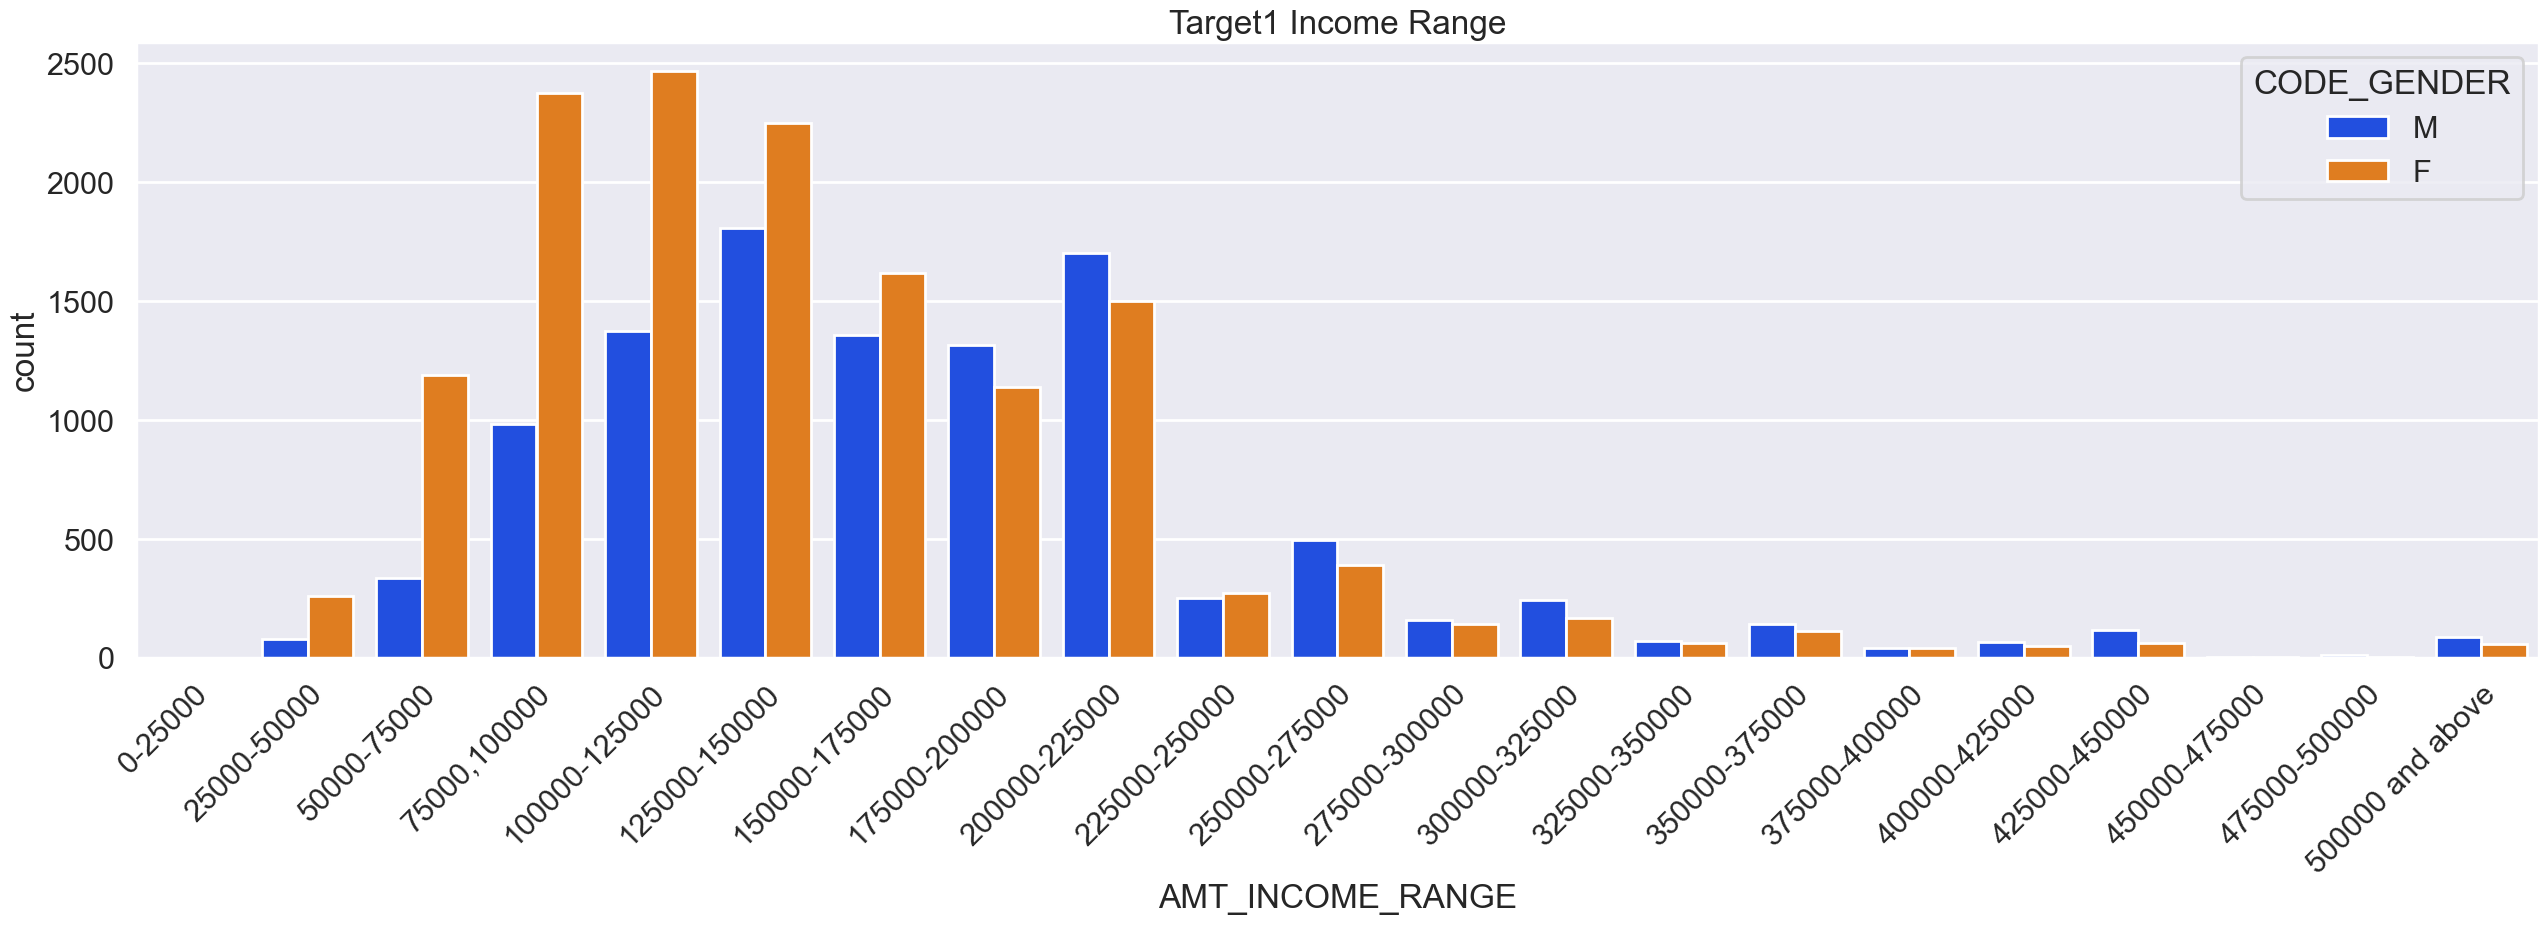

In [41]:
#plotting chart for target1
chart(target1, col="AMT_INCOME_RANGE", title="Target1 Income Range", hue="CODE_GENDER")

**Insights:**
1. Above graph is based on the income range of the defaulters.
2. This graph have male in higher number as compare to female.

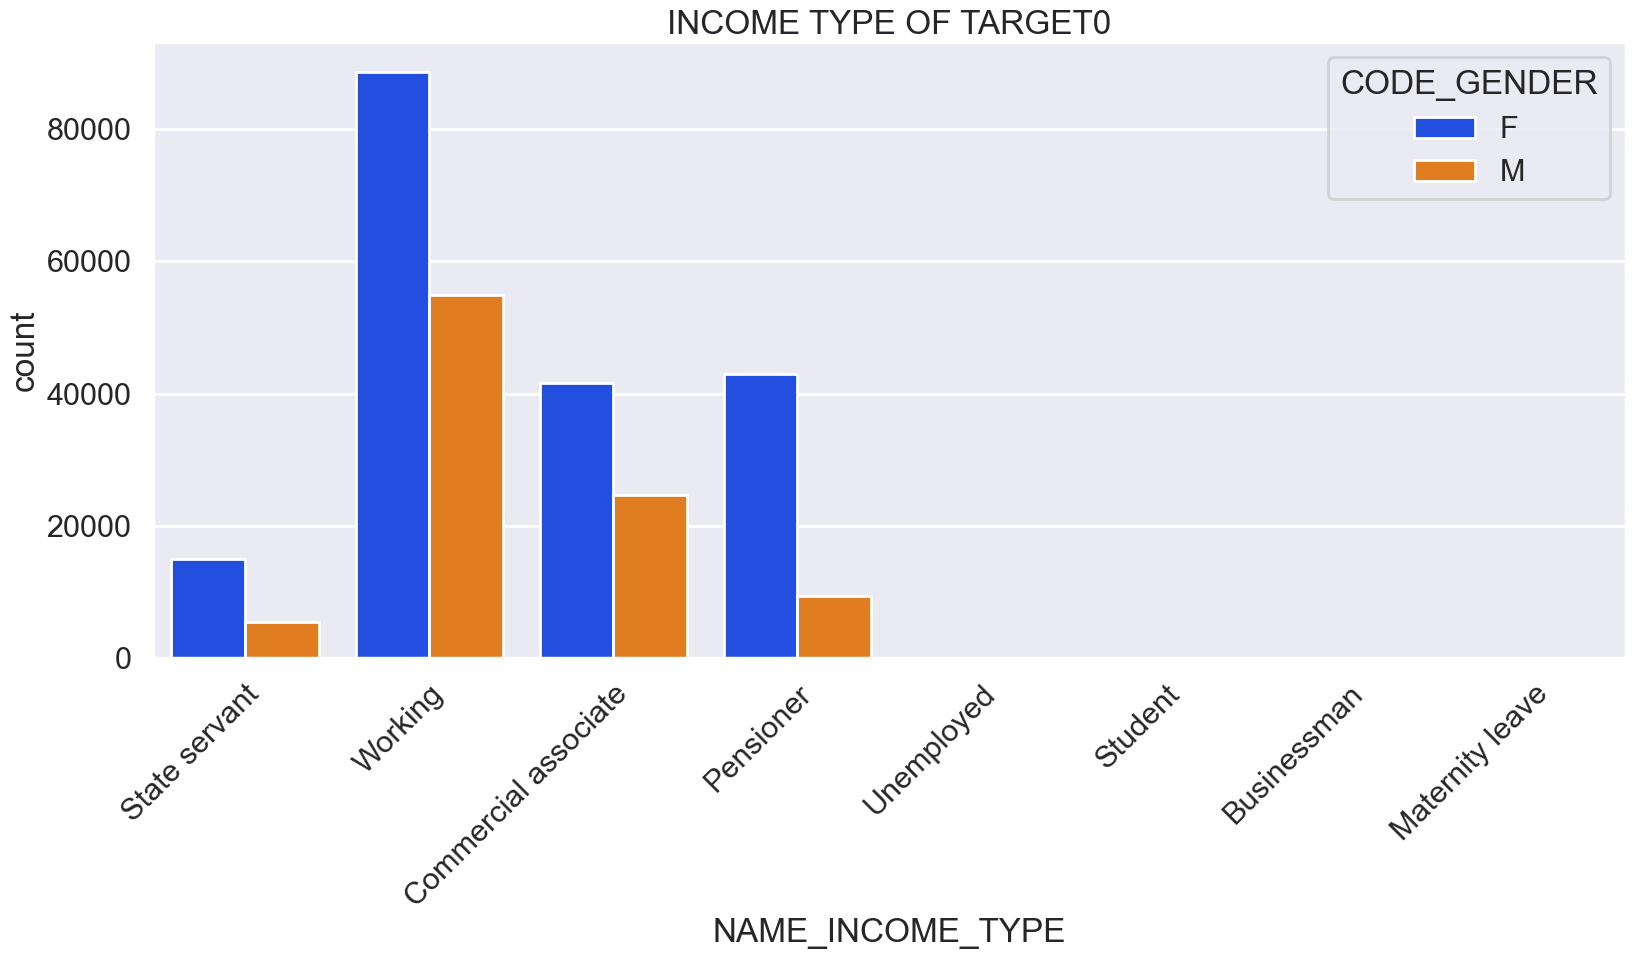

In [42]:
#graph for income type of target0
chart(target0, col="NAME_INCOME_TYPE", title="INCOME TYPE OF TARGET0", hue="CODE_GENDER")

**Insights:**
1. Above chart is based on the type of job or there source of income
2. Females are having more credit as compare to males.
3. Working, Commercial associate and Pensioner are having higher credit as compare to Unemployed, Student, Businessman, State servant and Maternity Leave.

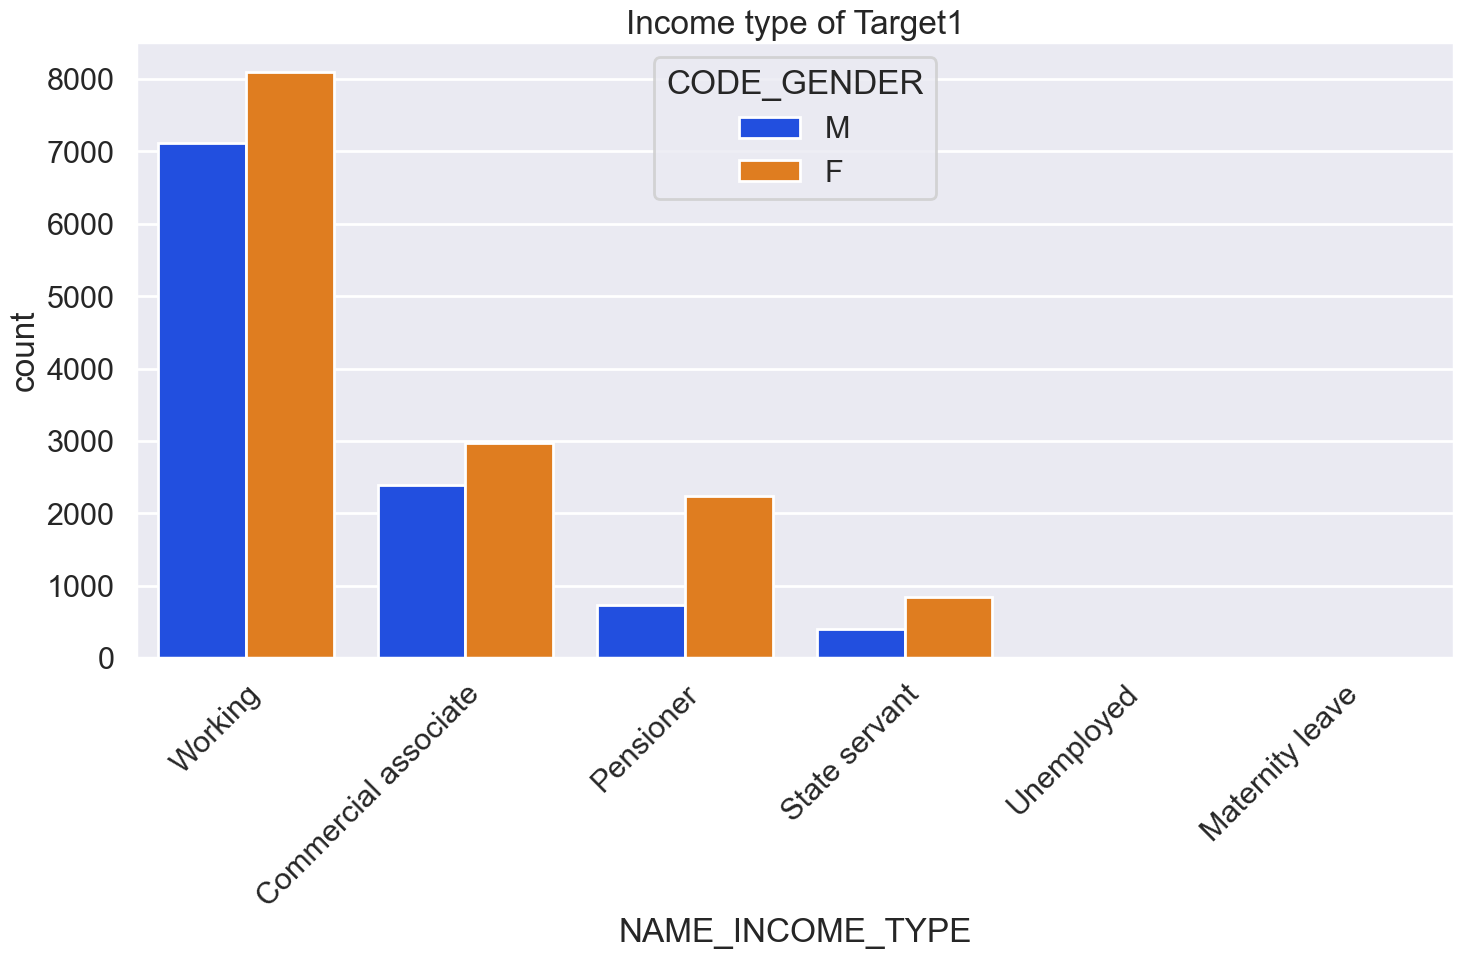

In [44]:
#graph for income type of target1
chart(target1, col="NAME_INCOME_TYPE", title="Income type of Target1", hue="CODE_GENDER")

**Insights:**
1. Above chart is based on income type of defaulters.
2. Working, Commercial associate are having high credit.
3. Pensioner, State servant are having low credit.
4. Unemployed, Maternity are not having any credit

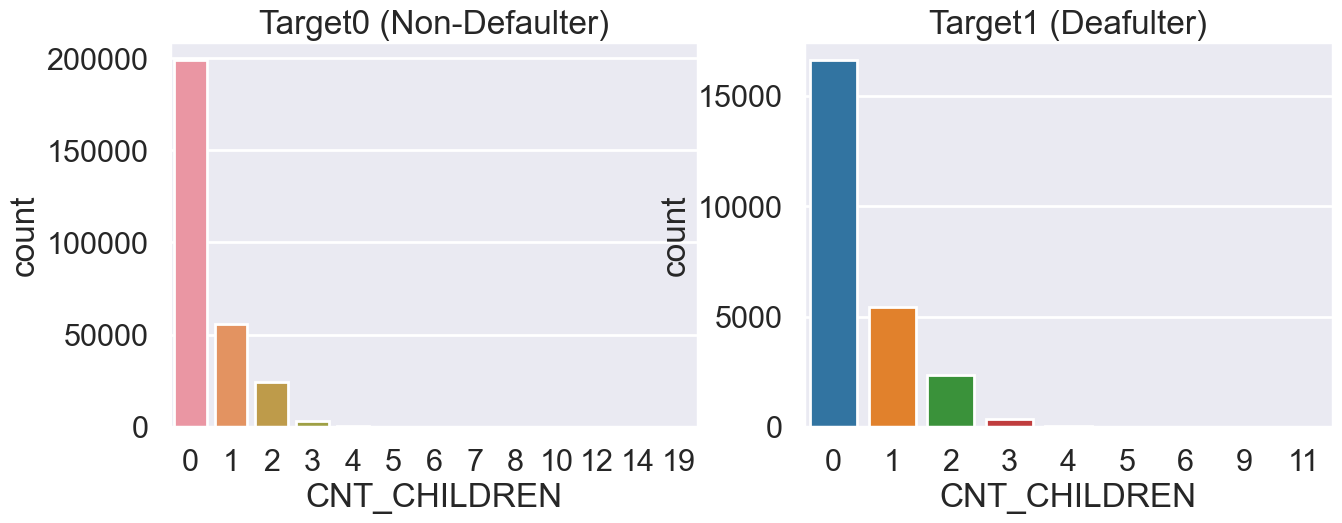

In [45]:
#graph for count of children for target0 and target1
fig, ax= plt.subplots(1,2, figsize=(15,5))
sns.countplot(target0["CNT_CHILDREN"], ax=ax[0]).set_title("Target0 (Non-Defaulter)")
sns.countplot(target1["CNT_CHILDREN"], ax=ax[1]).set_title("Target1 (Deafulter)")
fig.show()

**Insights:**
1. In the above graphs we can see that low child count maximizes that the chances of both being a defaulter and non-defaulter.
2. from the above exploration we cannot conclude any specifics 

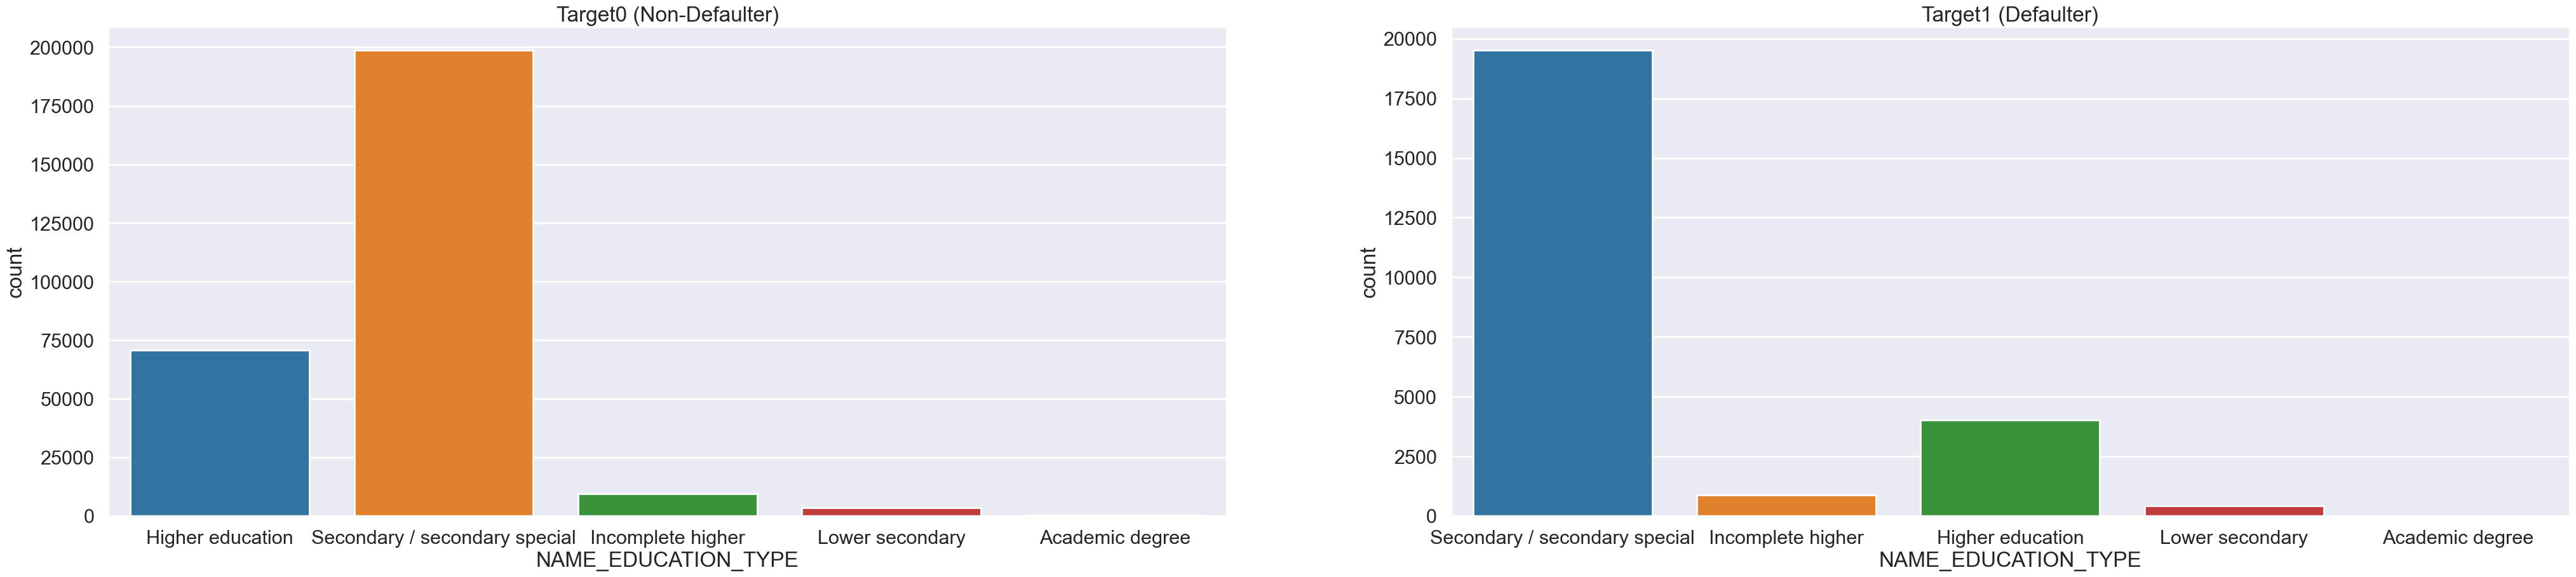

In [46]:
#graph for NAME_EDUCATION-TYPE for target0 and target1
fig,ax=plt.subplots(1,2, figsize=(50,10))
sns.countplot(target0["NAME_EDUCATION_TYPE"], ax=ax[0]).set_title("Target0 (Non-Defaulter)")
sns.countplot(target1["NAME_EDUCATION_TYPE"], ax=ax[1]).set_title("Target1 (Defaulter)")
fig.show()

**Insights:**
1. From the above graph we can conclude that people with secondary education has defaulted most.

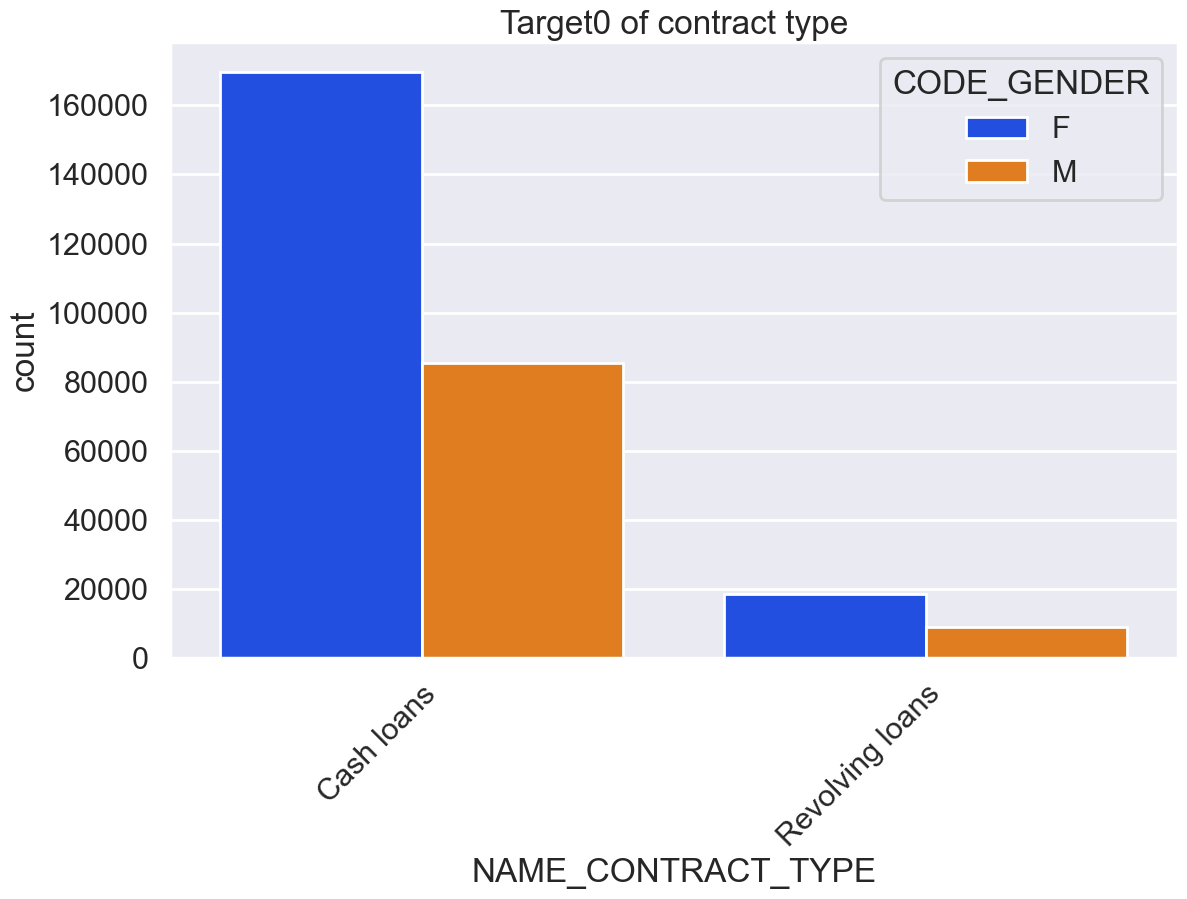

In [72]:
#graph for NAME_CONTRACT_TYPE for target0
chart(target0, col="NAME_CONTRACT_TYPE", title="Target0 of contract type", hue="CODE_GENDER")

**Insights:**
1. From the above graph we can conclude that count of female is more.
2. Cash loans have higher credit number as compare to revolving loans.

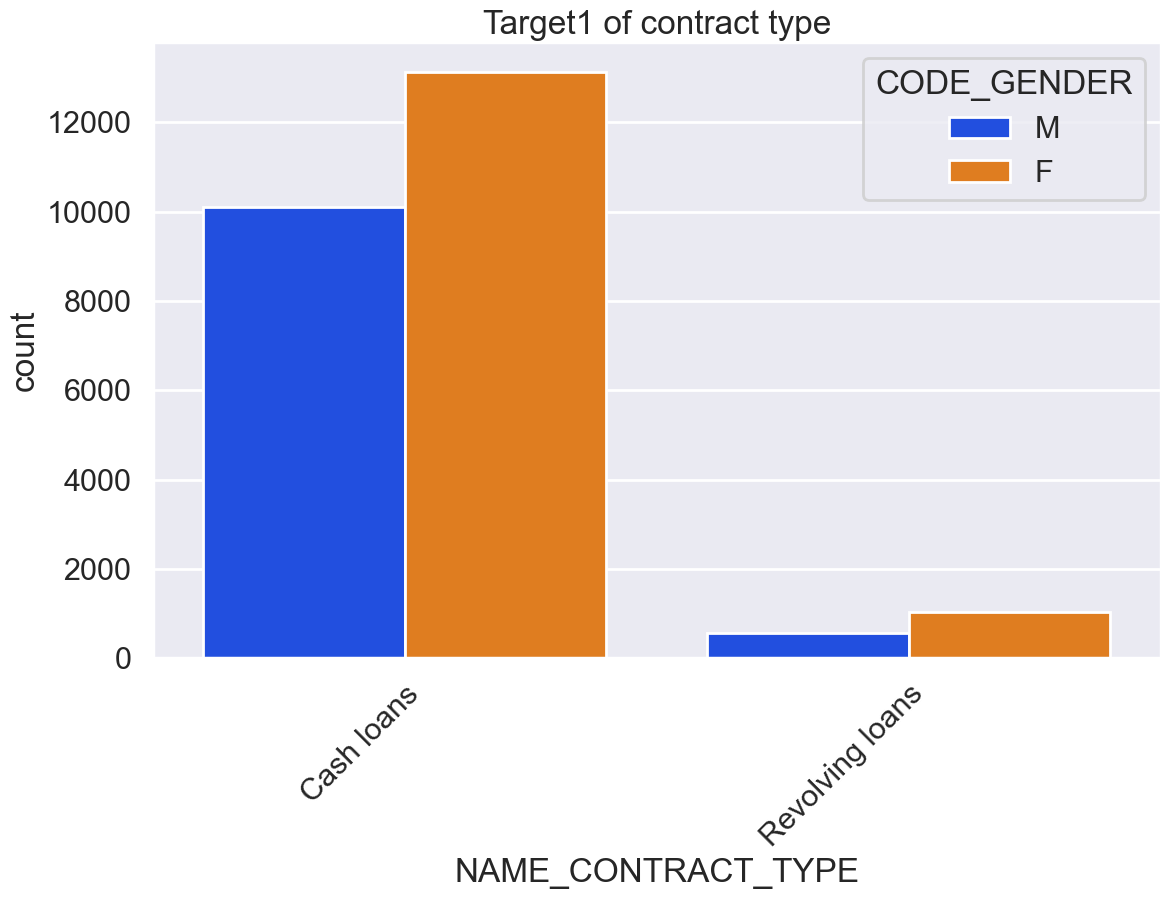

In [48]:
#graph for NAME_CONTRACT_TYPE for target1
chart(target1, col="NAME_CONTRACT_TYPE", title="Target1 of contract type", hue="CODE_GENDER")

**Insights:**
1. From the above graph we can conclude that cash loans has higher credit as compare to revolving loans for Defaulters.

### Bivariate Analysis

**Analysing the correlation for target0(Non-Defaulter) and target1(Defaulter)**

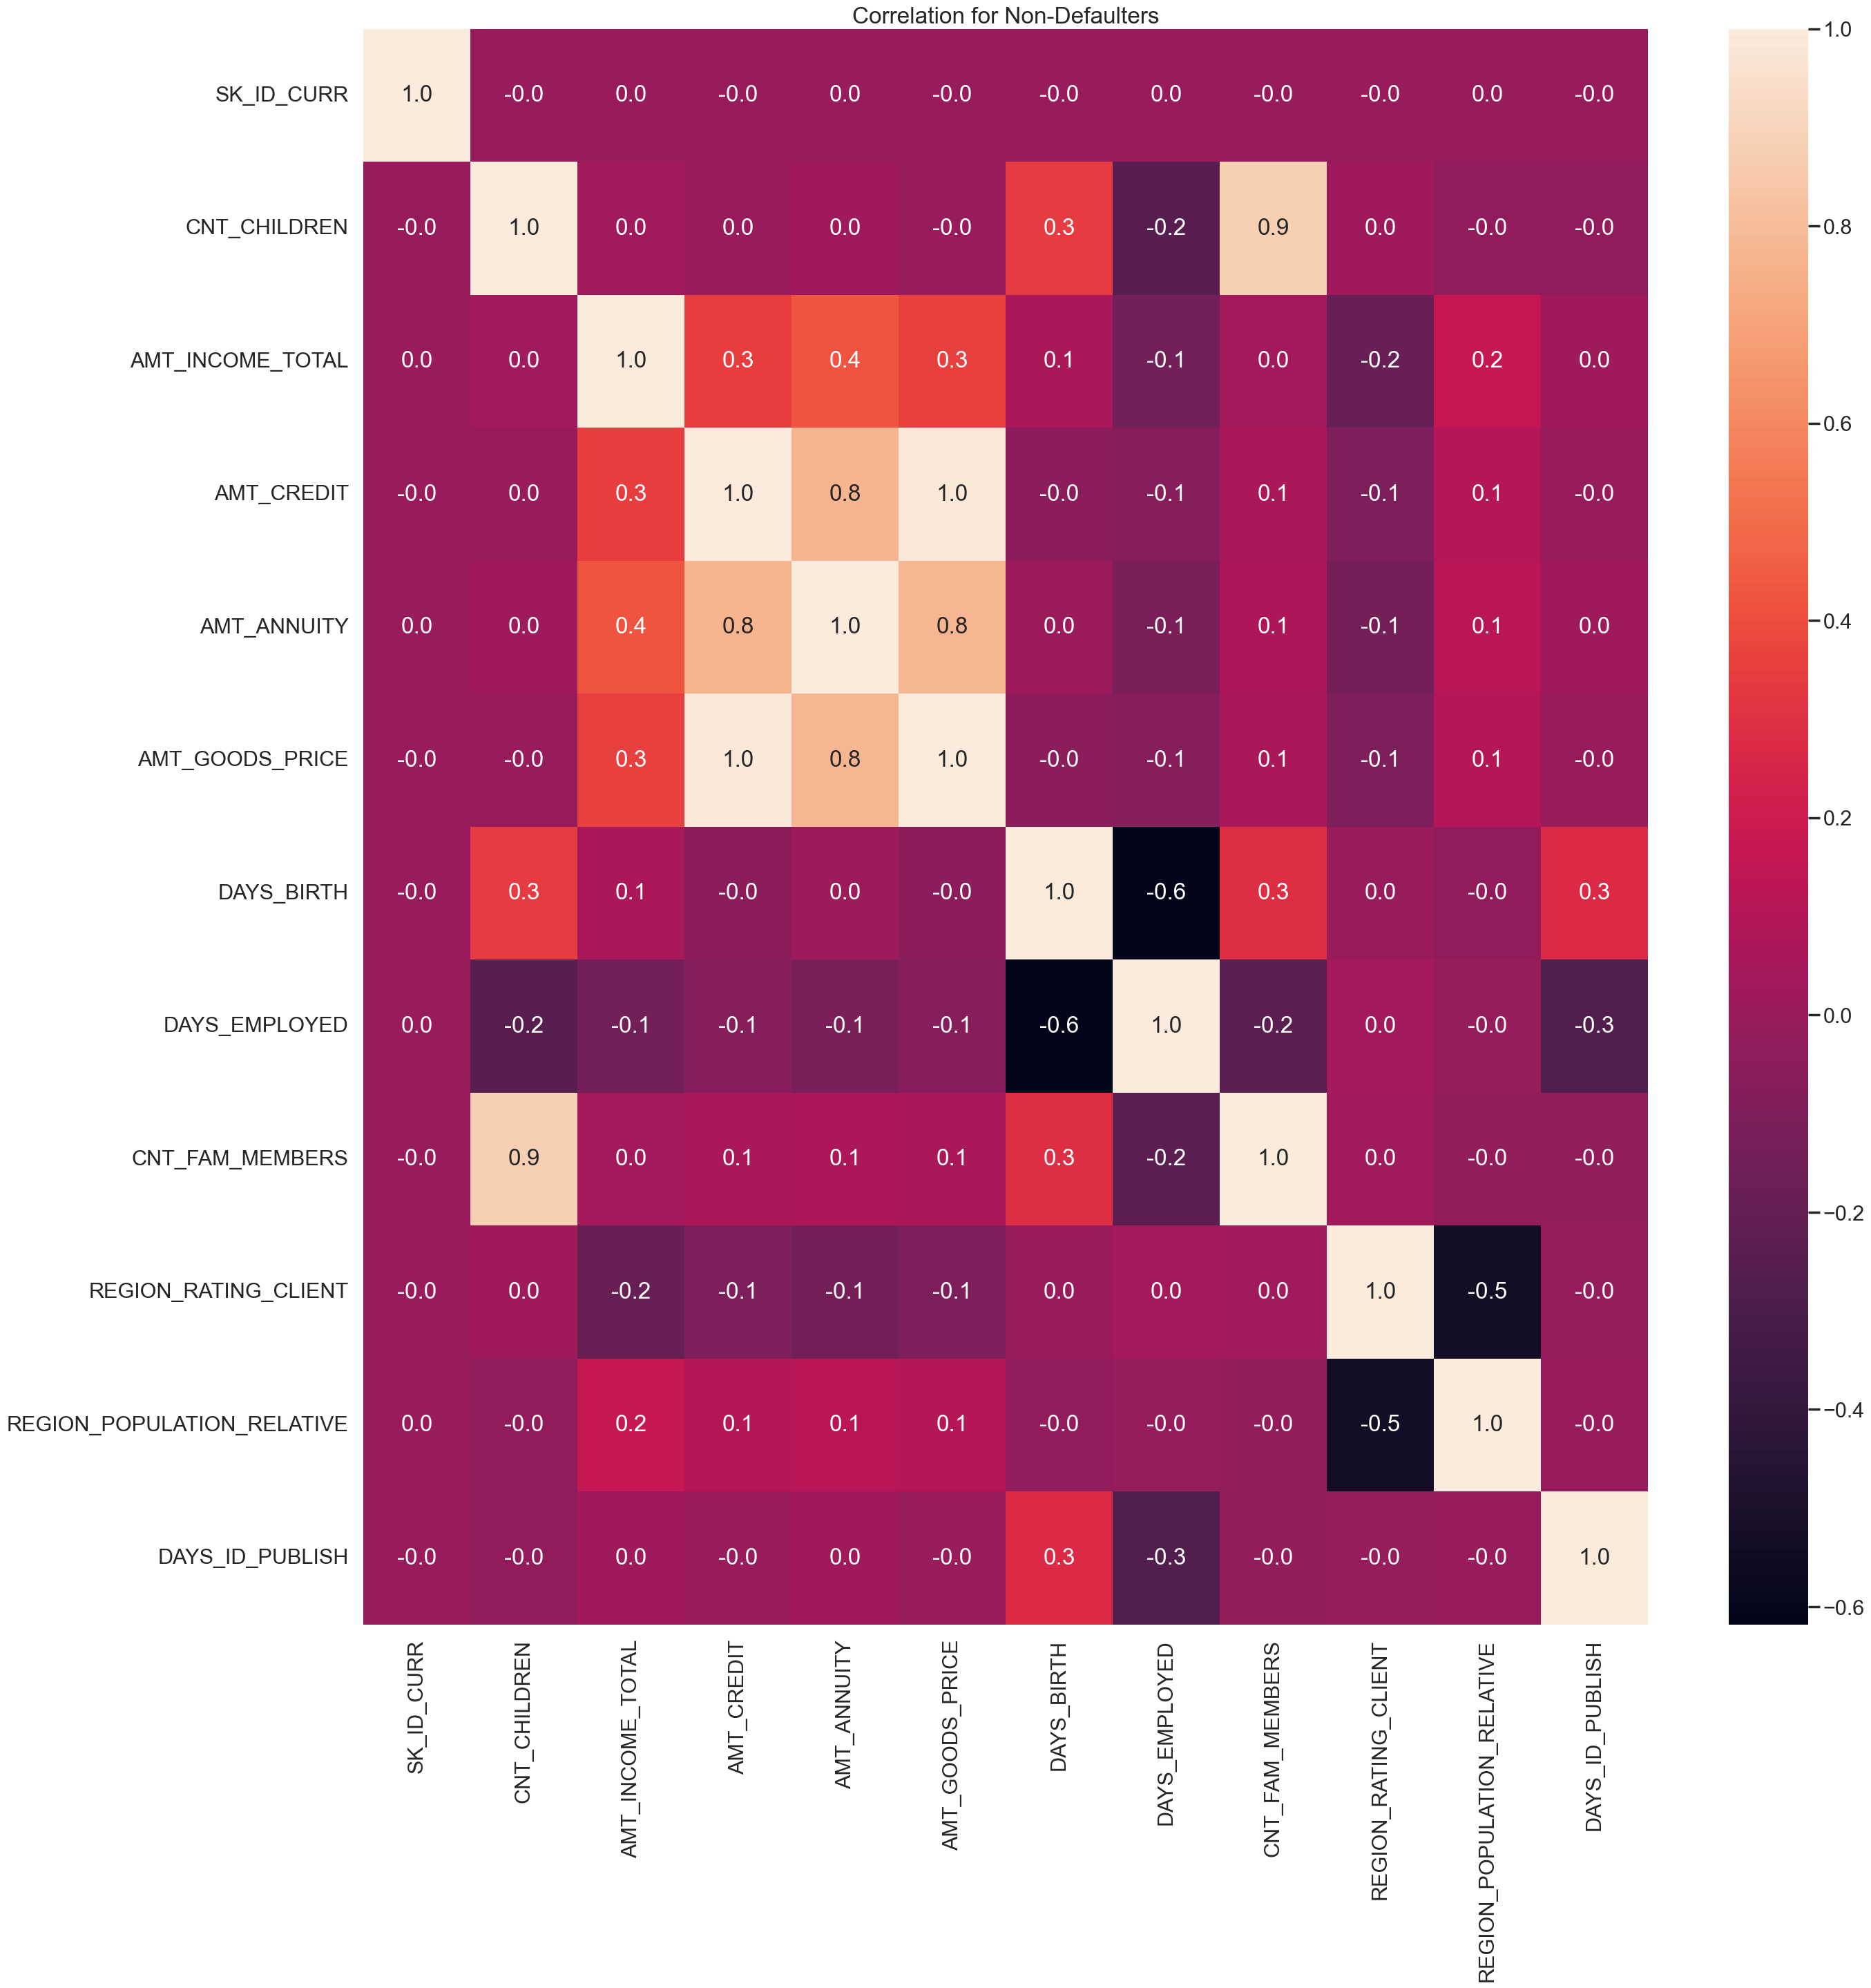

In [49]:
#chart for target0 using variable "a"
a=target0[['SK_ID_CURR','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_POPULATION_RELATIVE','DAYS_ID_PUBLISH']]
plt.figure(figsize=(30,30))
sns.heatmap(a.corr(), fmt='.1f',annot=True)
plt.title("Correlation for Non-Defaulters")
plt.show()

**Insights:**
1. From above heatmap we can conclude that these columns have high correlation for target0 (Non-Defaulter):
    CNT_CHILDREN and CNT_FAM_MEMBERS
    AMT_CREDIT and AMT_ANNUITY<br>
    AMT_ANNUITY and AMT_GOODS_PRICE<br>
    AMT_INCOME_TOTAL and AMT_ANNUITY<br>
    AMT_INCOME_TOTAL and AMT_CREDIT<br>
    

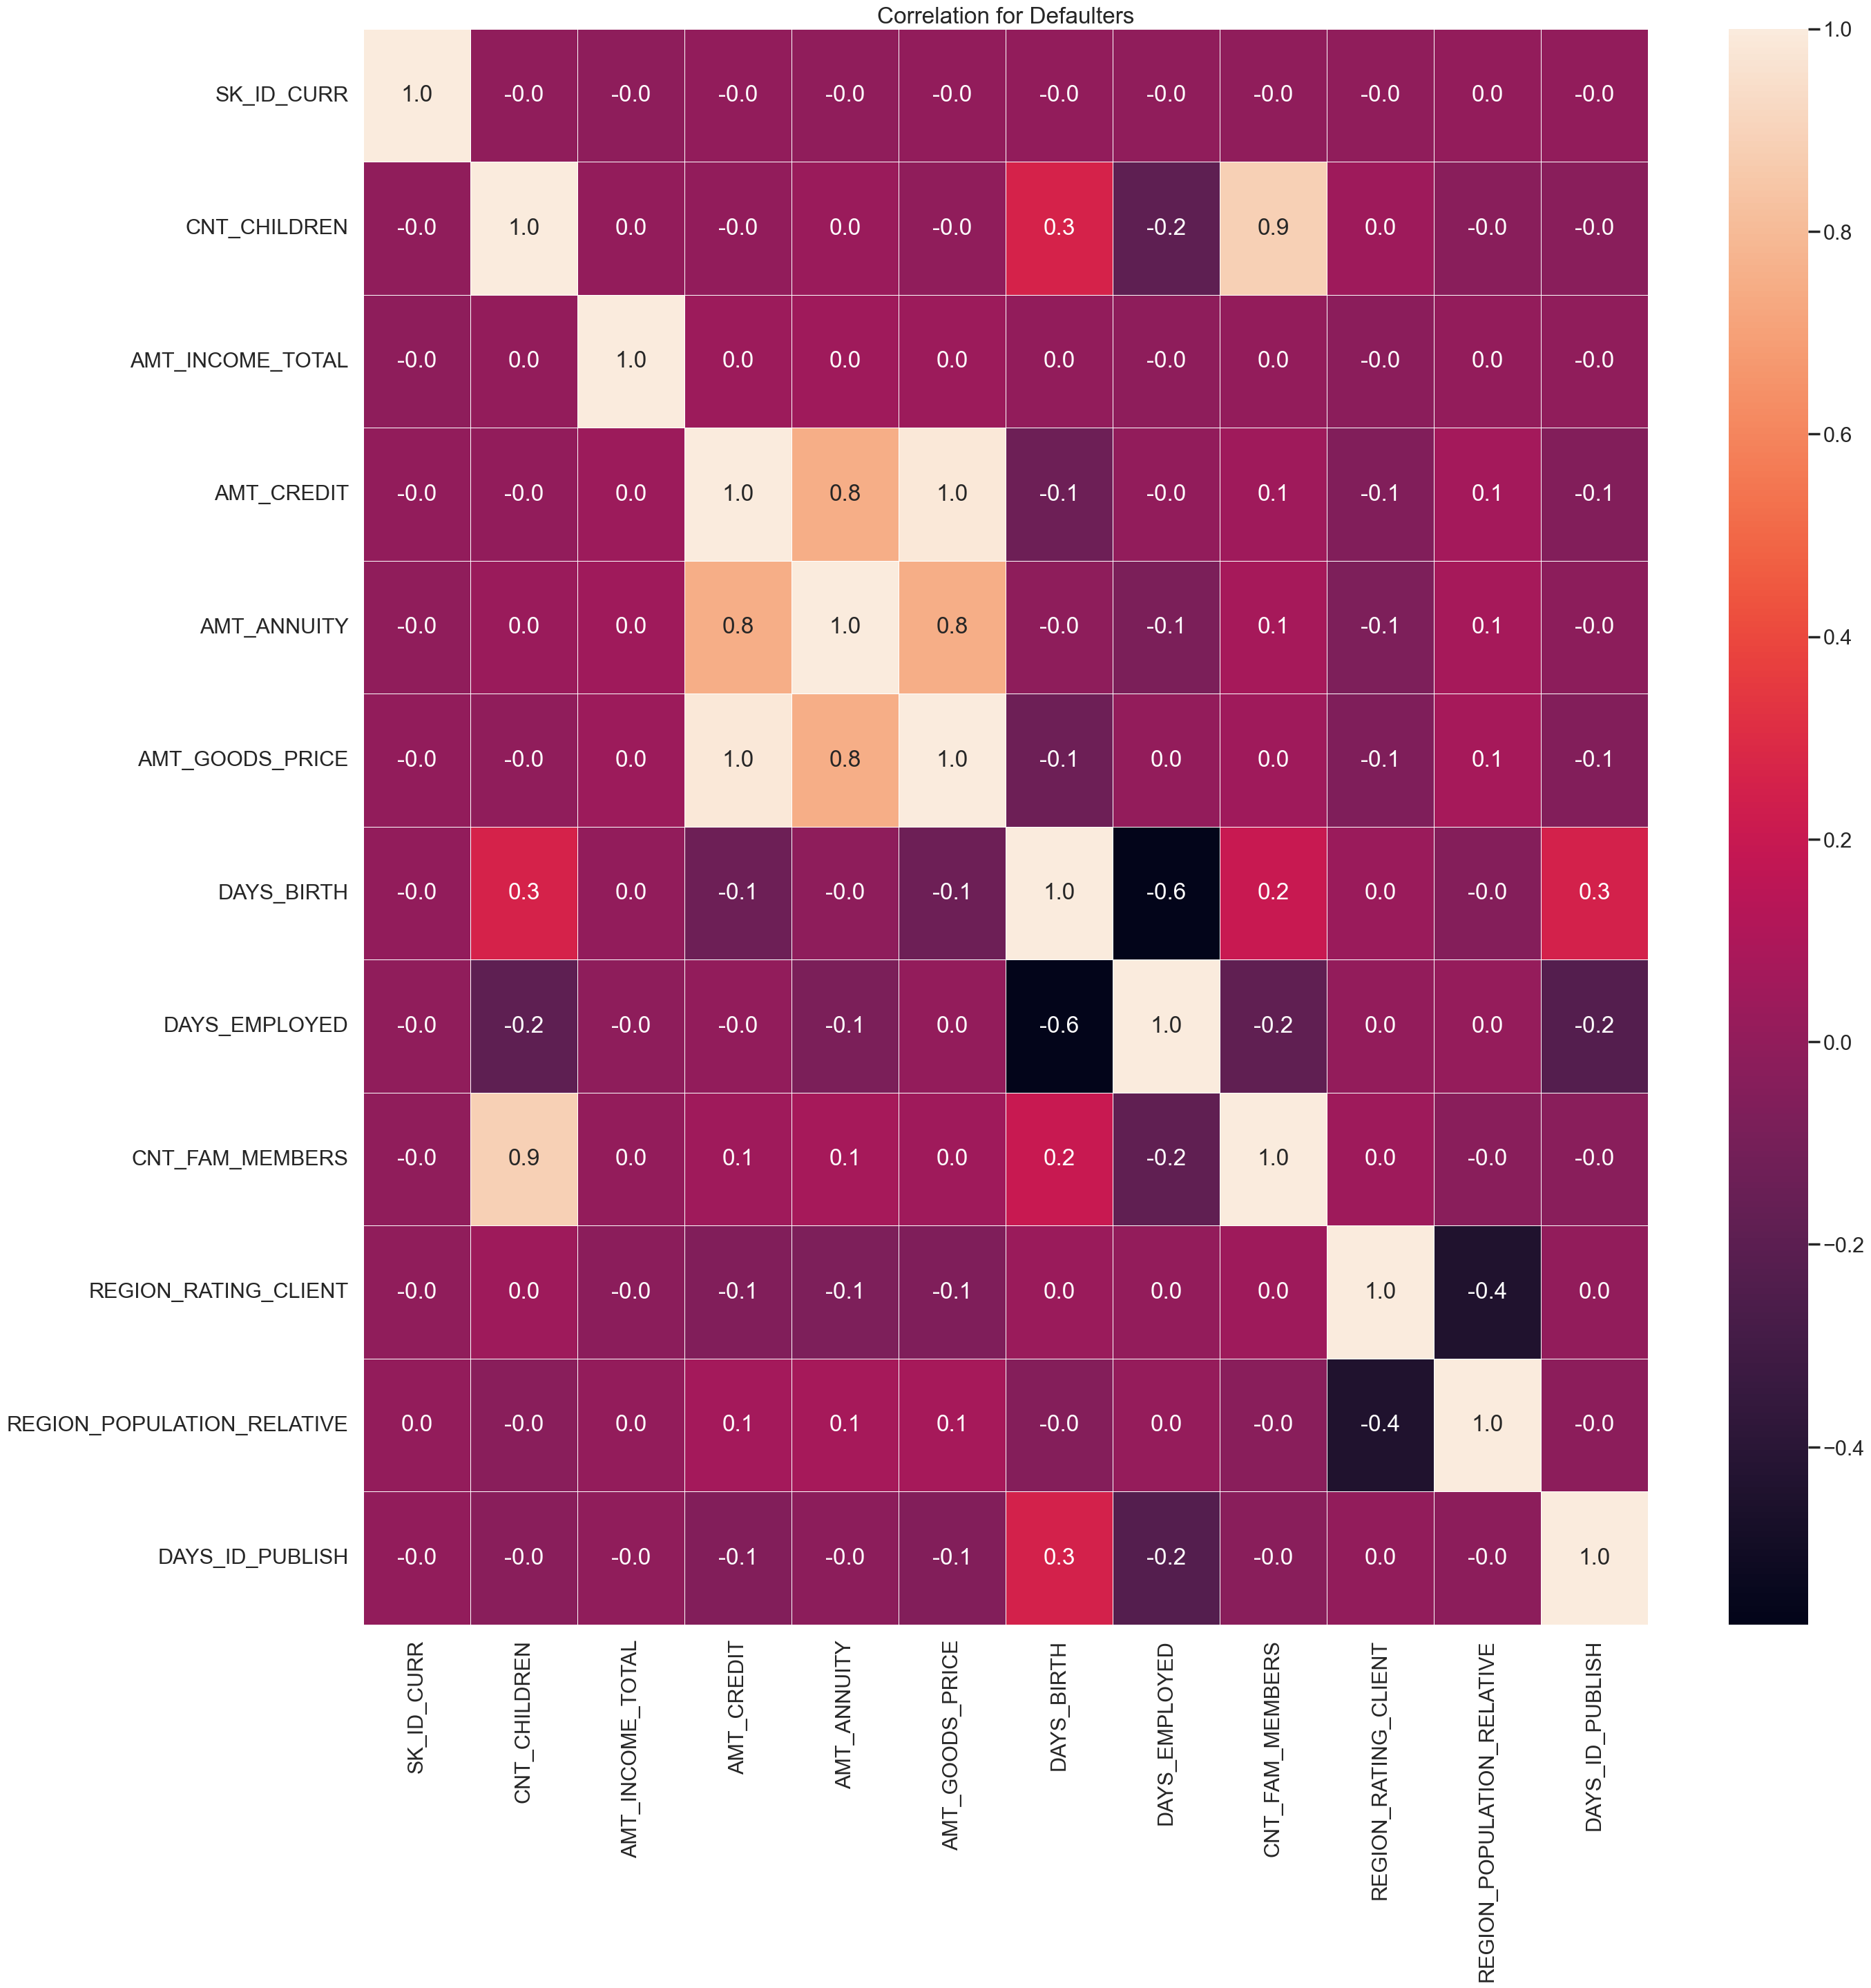

In [50]:
#chart for target1 using variable "b"
b=target1[['SK_ID_CURR','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_POPULATION_RELATIVE','DAYS_ID_PUBLISH']]
f,ax=plt.subplots(figsize=(30,30))
sns.heatmap(b.corr(), fmt='.1f', annot=True, linewidth="0.5", ax=ax)
plt.title("Correlation for Defaulters")
plt.show()

**Insights:**
1. form the above heatmap we can conclude that the correlation for target1 (defaulter) are:
    CNT_CHILDREN and CNT_FAM_MEMBERS<br>
    AMT_CREDIT and AMT_ANNUITY<br>
    AMT_ANNUITY and AMT_GOODS_PRICE<br>

**Analyzing the credit amount with respect to education**

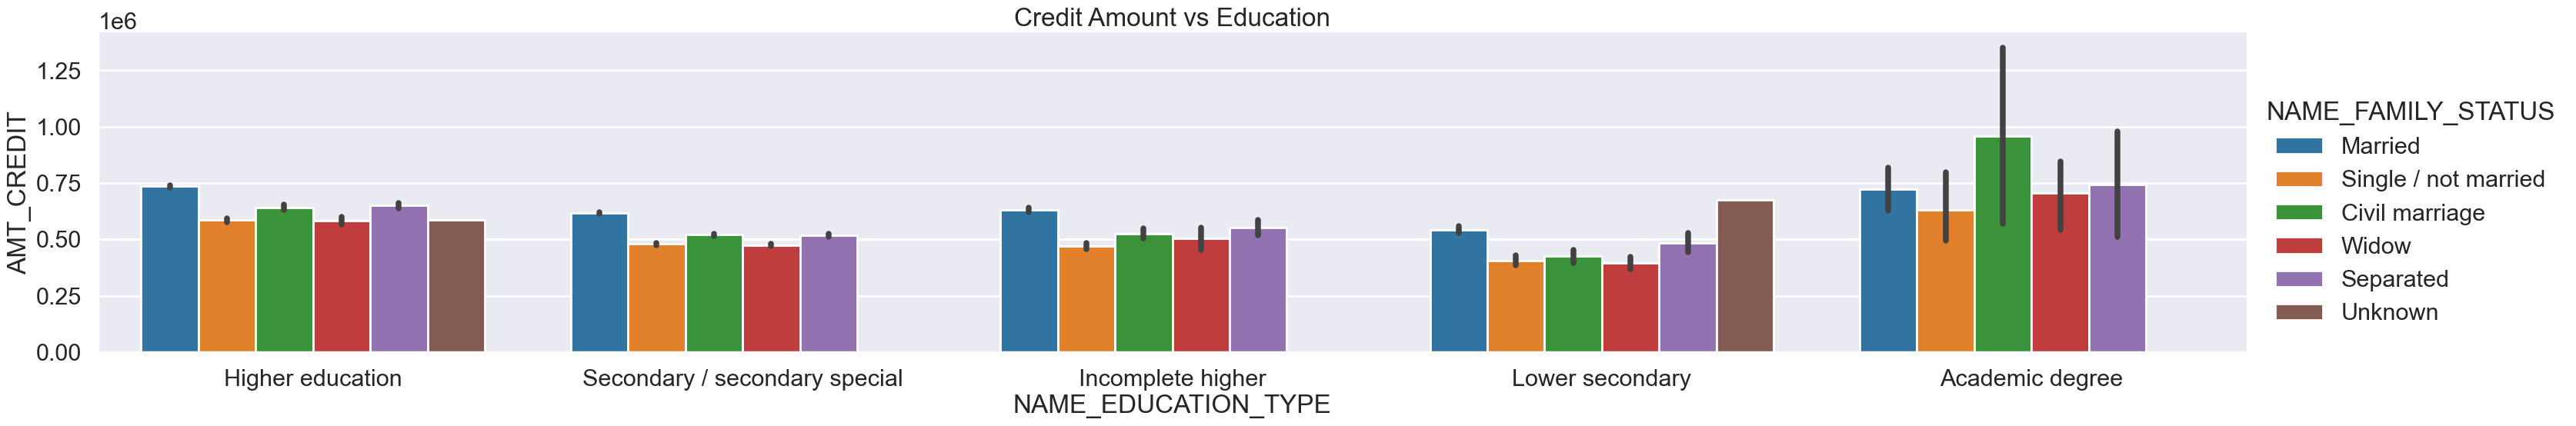

In [58]:
#plotting graph for NAME_EDUCATION_TYPE and AMT_CREDIT for target0 (Non-defaulters)
sns.catplot(data=target0, x="NAME_EDUCATION_TYPE", y="AMT_CREDIT", hue="NAME_FAMILY_STATUS", kind="bar",height=6, aspect=5)
plt.title("Credit Amount vs Education for target0")
plt.show()

**Insights:**
1. Above graph represents the amount credibility against the education for Non-Defaulter. From which we can conclude that the Academic Degree is having higher credit as compare to others.
2. In Academic degree the civil marriage is having higher credit amount as compare to others.
3. Lower secondary section is having lowest amount credit. In this section widow has lowest credit amount.

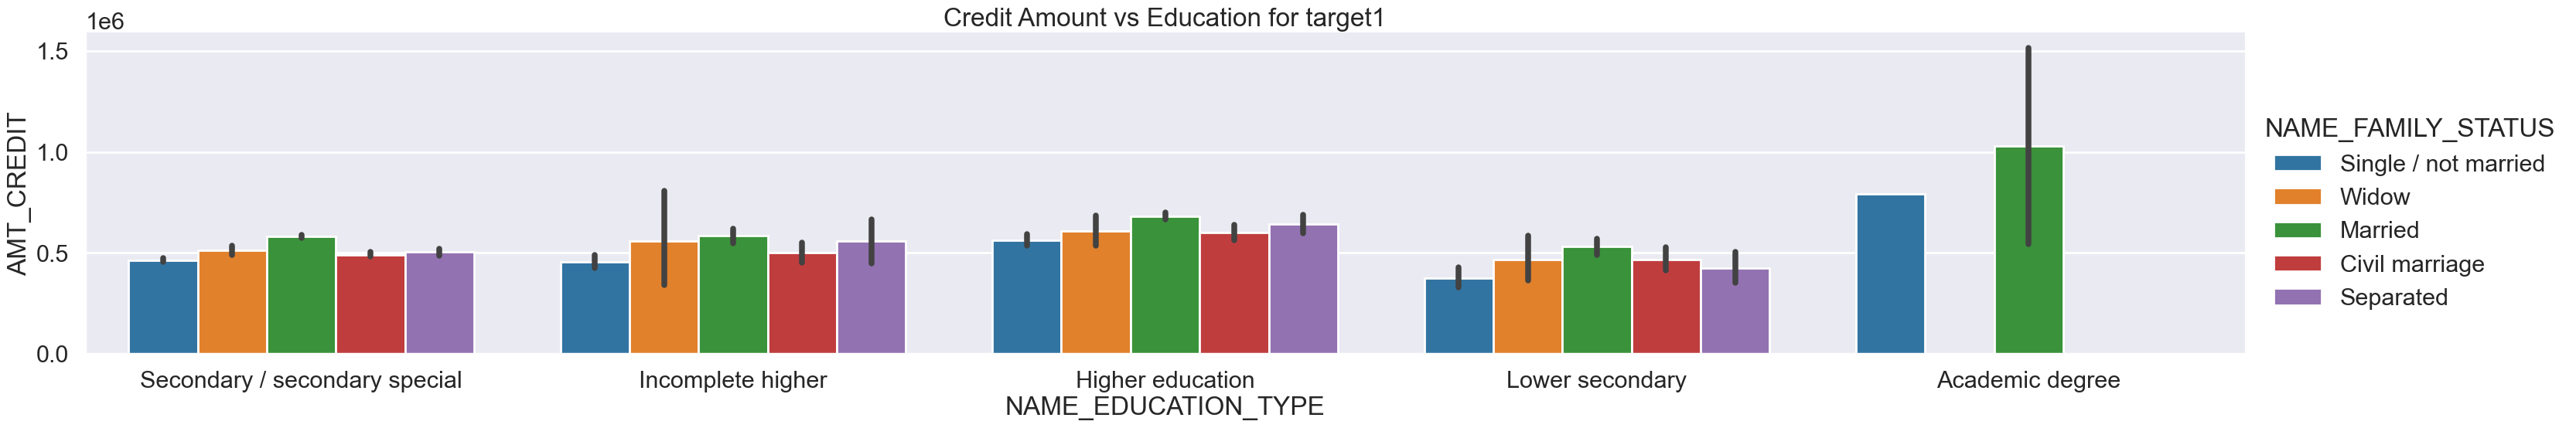

In [59]:
#plotting graph for NAME_EDUCATION_TYPE VS AMT_CREDIT for target1(Defaulters)
sns.catplot(data=target1, x="NAME_EDUCATION_TYPE", y="AMT_CREDIT", hue="NAME_FAMILY_STATUS", kind="bar", height=6, aspect=5)
plt.title("Credit Amount vs Education for target1")
plt.show()

**Insights:**
1. above graph represents the amount credited with respect to education status. From which we can conclude that Academic degree is having high credit as compare to others.
2. In Academic degree Married section is having high credit and widow, civil marriage, seperated are having no credits.
3. Lower Secondary have low credit. In Lower Secondary single/not married section is having lowest credit.

**Analizing the income with Education**

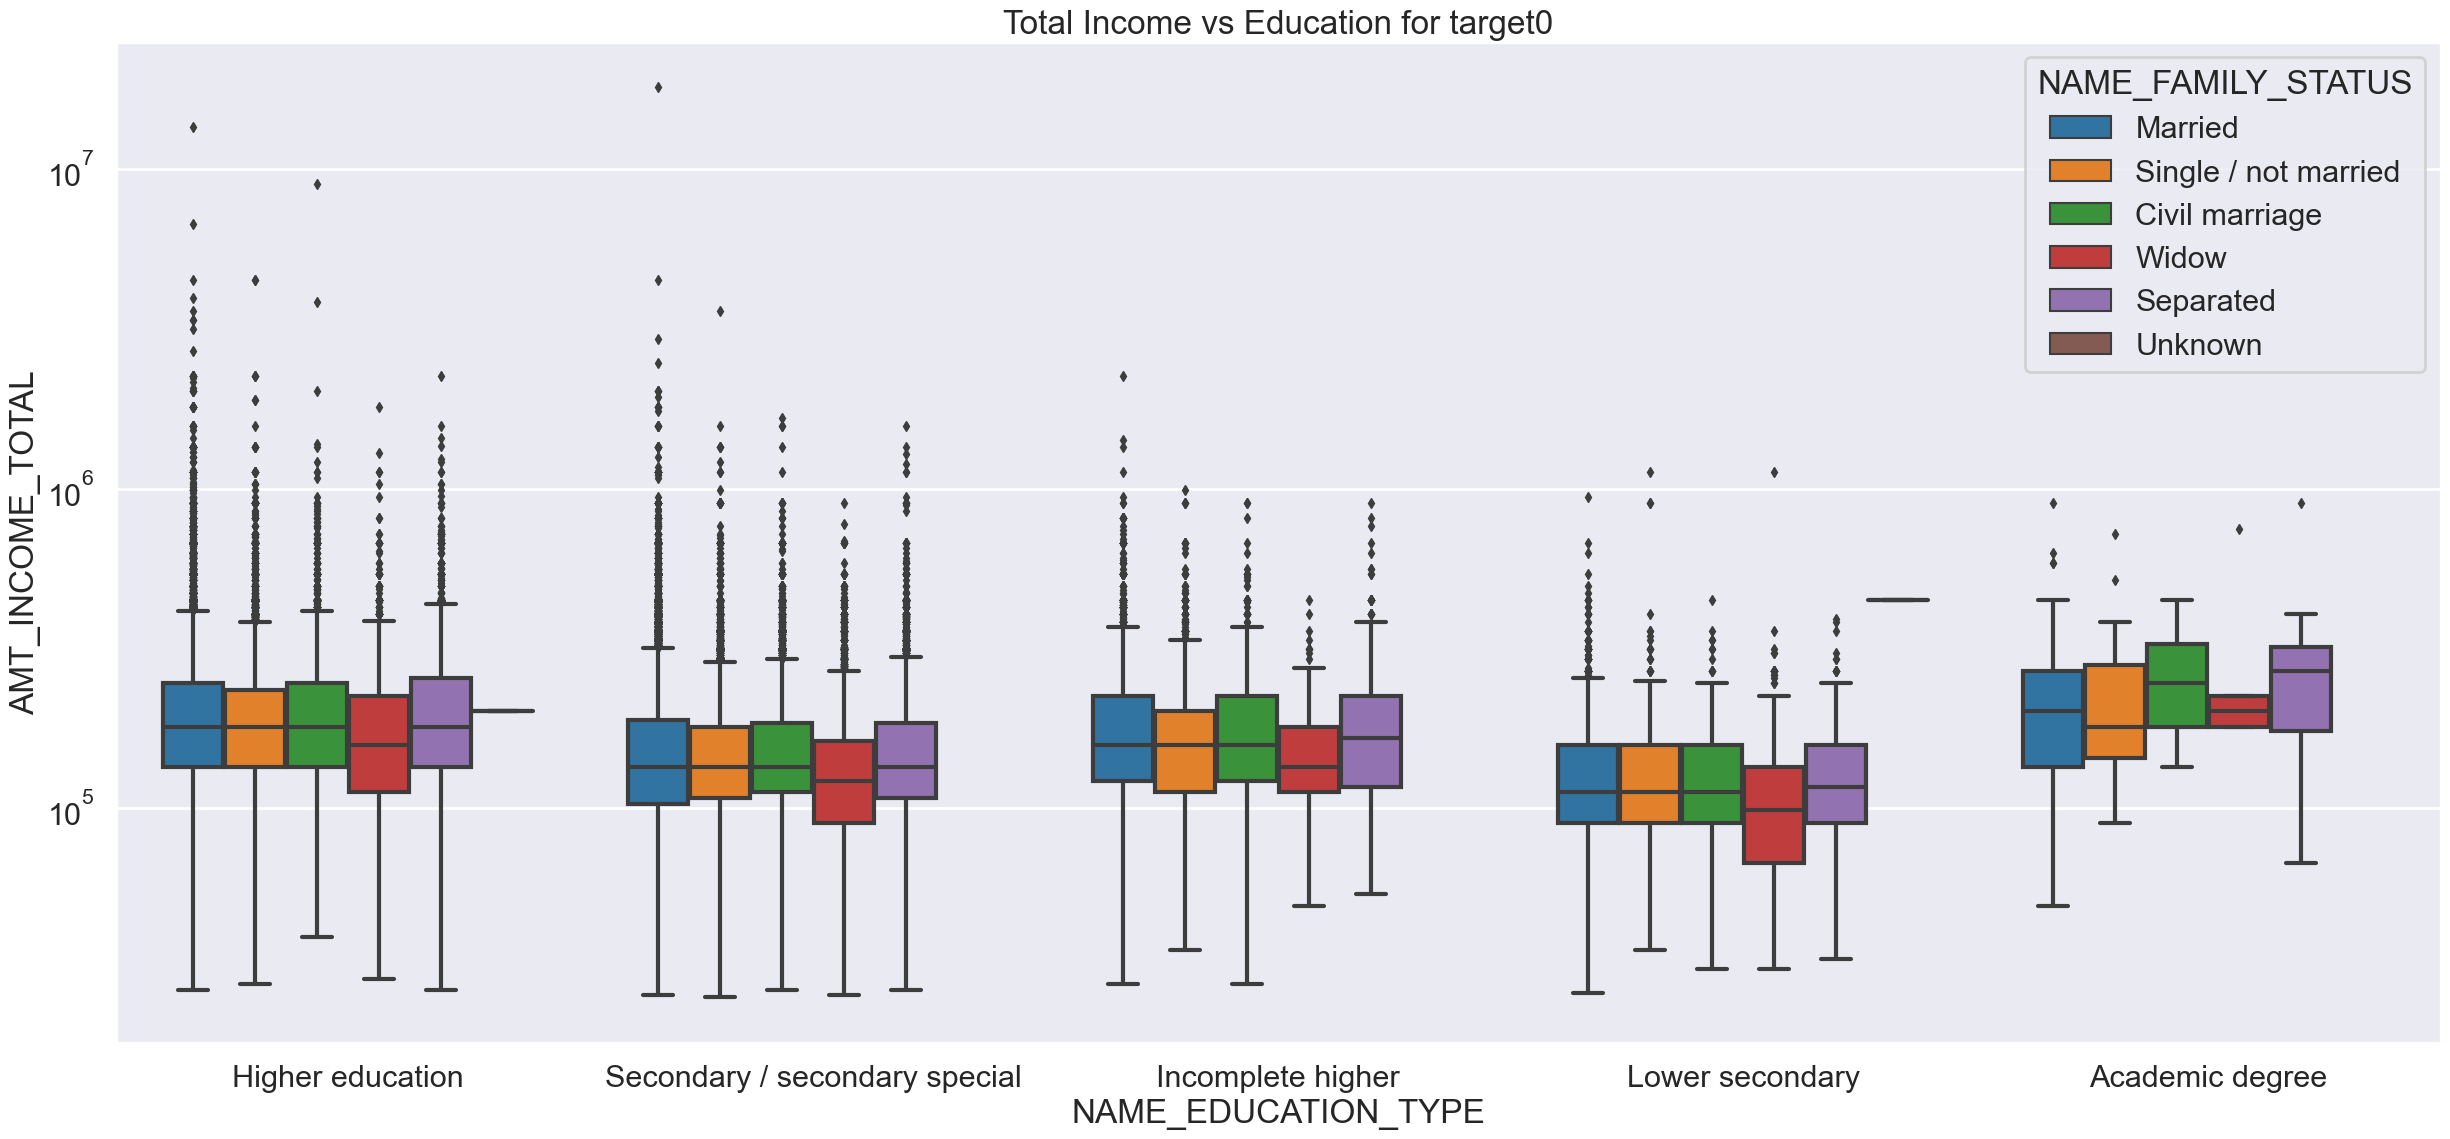

In [67]:
#using boxplot due to presence of outliers,to plot the graph of total income vs education
plt.figure(figsize=(30,13))
plt.yscale('log')
sns.boxplot(data=target0, x="NAME_EDUCATION_TYPE", y="AMT_INCOME_TOTAL", hue="NAME_FAMILY_STATUS")
plt.title("Total Income vs Education for target0")
plt.show()

**Insights:**
1. Above graph represents the Total income as compare to education for the Non-Defaulters. from which we can conclude that Academic degree is having higher amount of total income as compare to others.
2. Lower Secondary is having lowest income.
3. Academic Degree is having lower outliers.

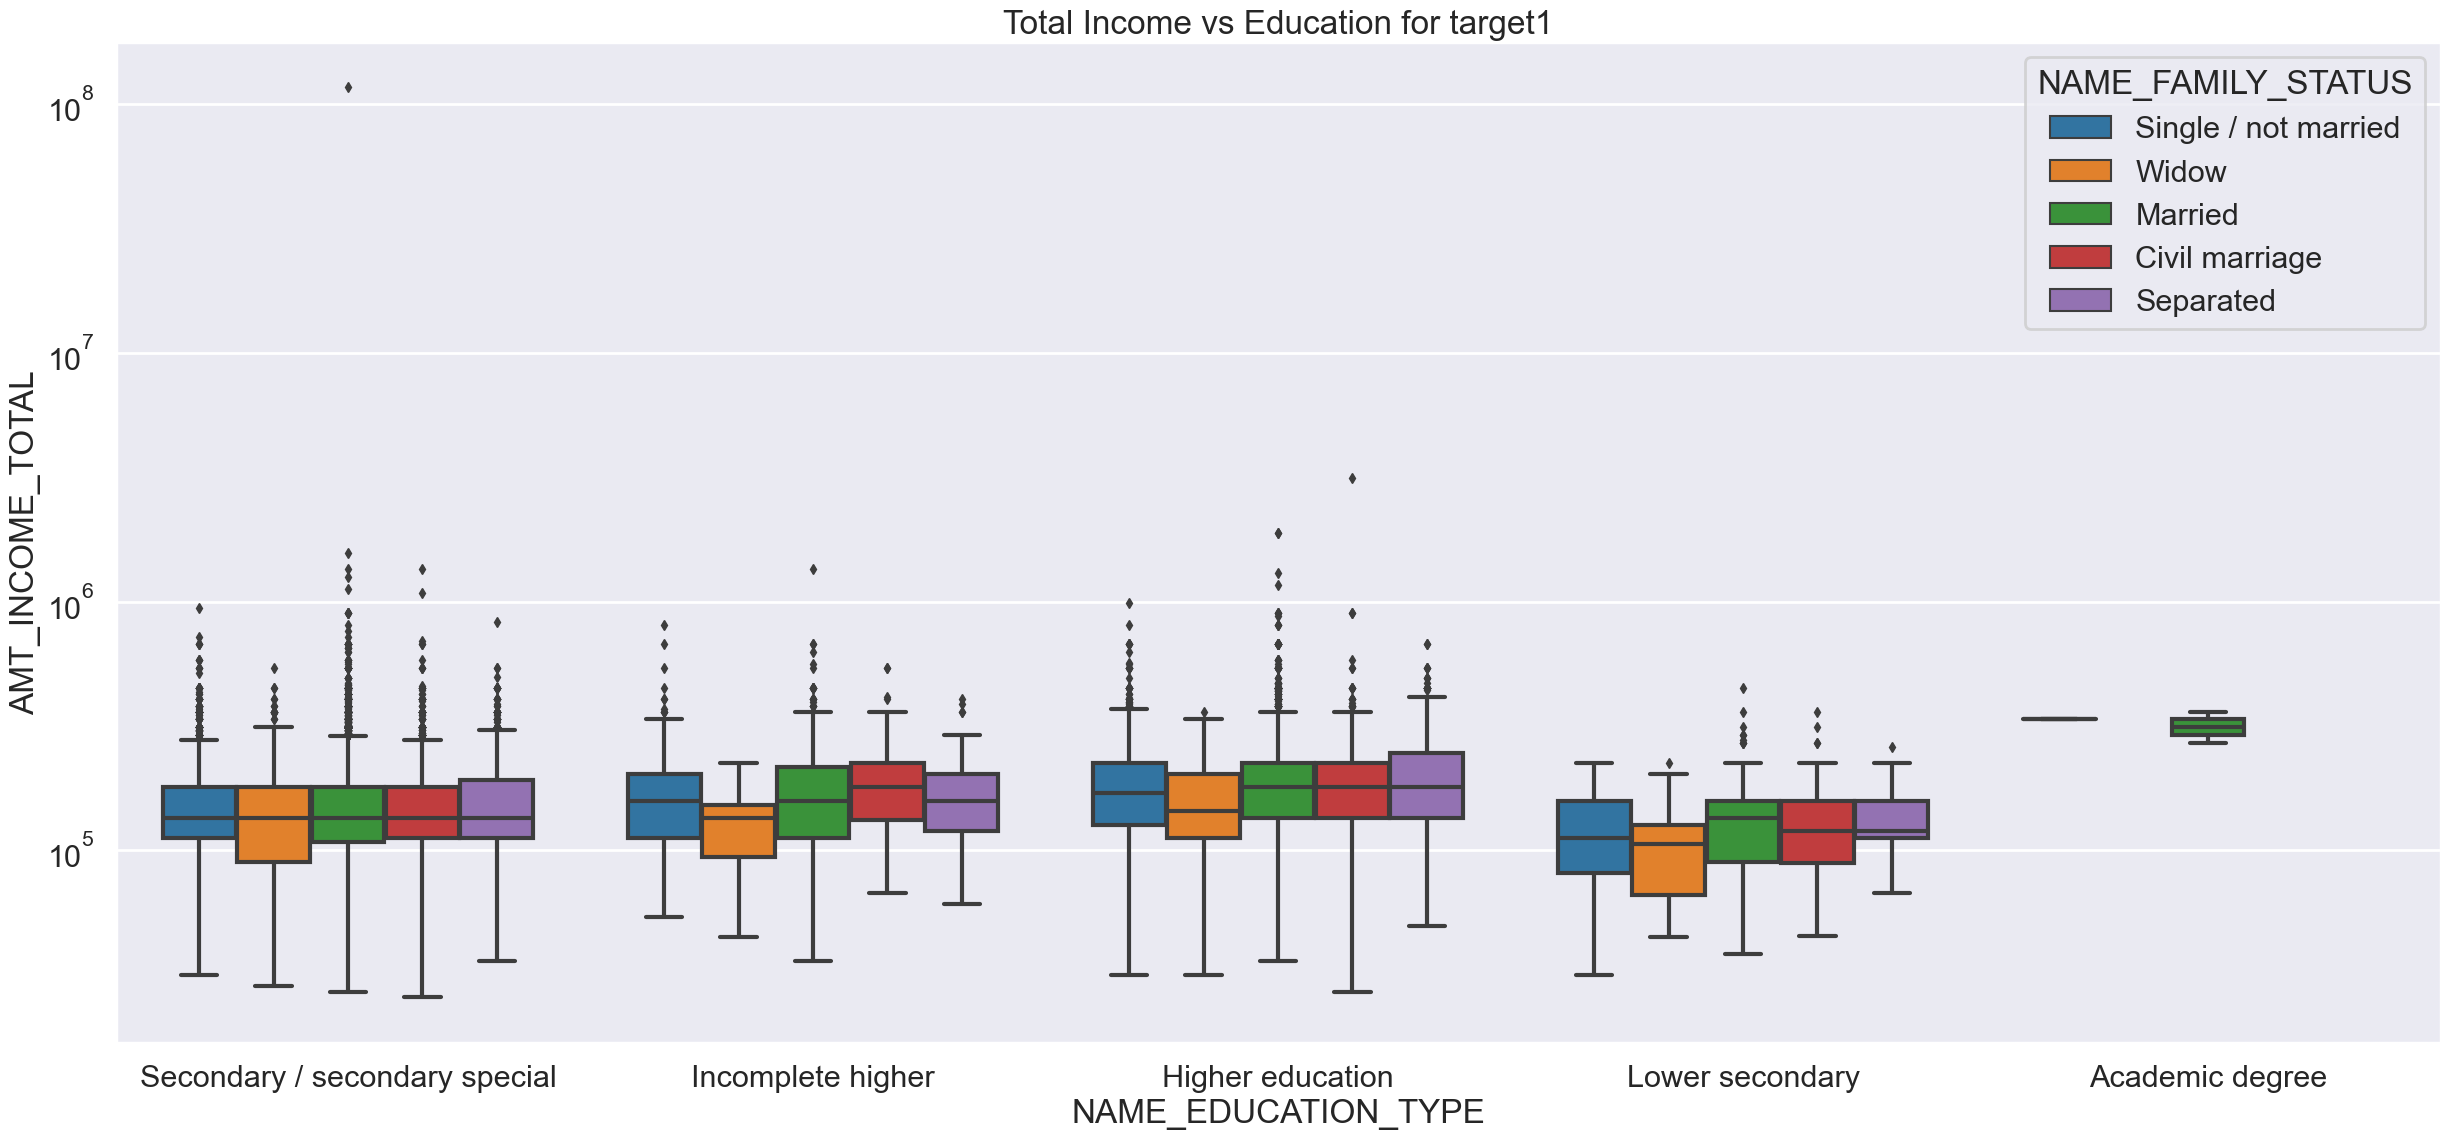

In [69]:
#using boxplot to plot the graph of total income vs education for target1
plt.figure(figsize=(30,13))
plt.yscale('log')
sns.boxplot(data=target1, x="NAME_EDUCATION_TYPE", y="AMT_INCOME_TOTAL", hue="NAME_FAMILY_STATUS")
plt.title("Total Income vs Education for target1")
plt.show()

**Insights:**
1. Above graph represent the total income with respext to education for defaulters. From which we can conclude that Academic Degree is having higher income as compare to others. 
2. Lower Secondary is having low income. In which widow section is having lowest income.
3. In academic degree only married is showing and the rest of the section is not being represented.
4. The median value of secondary/secondary special is same for every section.

# Dataset 2- "previousapplication.csv"

In [3]:
#uploding data csv in dataframe 1 as df1
df1= pd.read_csv("previousapplication.csv")
#displaying the first 5 records from the df1
df1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#checking the shape of df1
df1.shape

(1670214, 37)

In [10]:
#info of the df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [20]:
#datatypes of the datas in df1
df1.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

**Cleaning the missing Data**

In [11]:
#listing the columns having missing values more than 50%
empty= df1.isnull().sum()
empty= empty[empty.values>(0.5*len(empty))]
len(empty)

15

In [12]:
#removing the columns having missing values more than 50%
empty= list(empty[empty.values>=0.5].index)
df1.drop(labels=empty, axis=1, inplace=True)
df1.shape

(1670214, 22)

In [4]:
#merging the application dataset with previous application data
merge1= pd.merge(left=df, right=df1, how="inner", on="SK_ID_CURR", suffixes="_x")

In [24]:
merge1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY,...,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,low_normal
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,low_normal
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,middle
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,middle
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,middle


In [5]:
#renaming the columns name after merging
merge1 = merge1.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [6]:
#removing unwanted columns for analysis
merge1.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

In [16]:
merge1.shape

(1413701, 89)

**Univariate Analysis of merge data**

Text(0.5, 1.0, 'Distribution of Contract status')

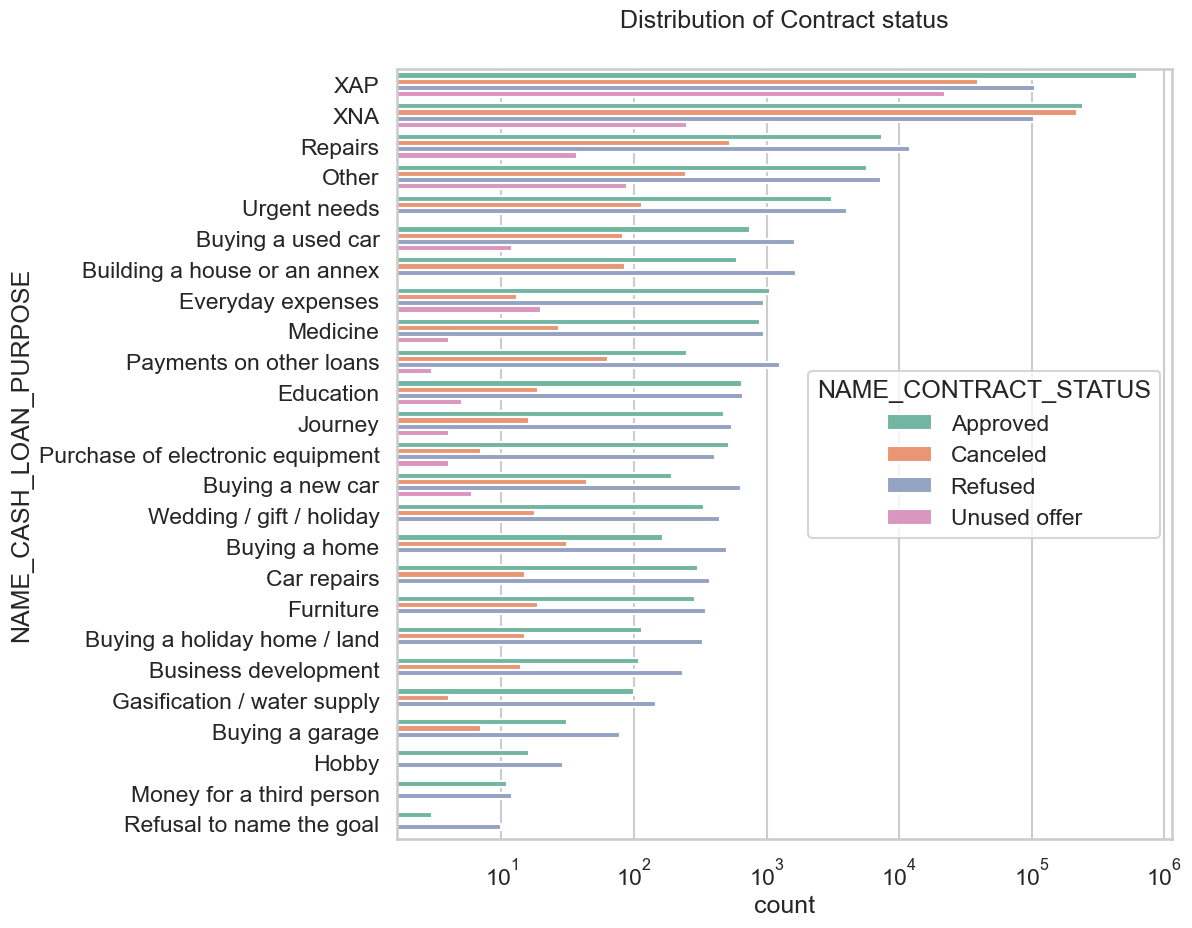

In [42]:
#distribution of contract status
plt.figure(figsize=(10,10))
plt.xscale("log")
sns.countplot(data=merge1, y="NAME_CASH_LOAN_PURPOSE",orient="v",
             order=merge1["NAME_CASH_LOAN_PURPOSE"].value_counts().index, hue="NAME_CONTRACT_STATUS", palette="Set2")
plt.title("Distribution of Contract status")

**Insights:**
1. From the above graph we can conclude that the most of rejection is from "repair" and "others".
2. We can see that Buying a used car, Building a house and payment on other loans are having equal number of rejection.

Text(0.5, 1.0, 'Distribution of Purposes with target')

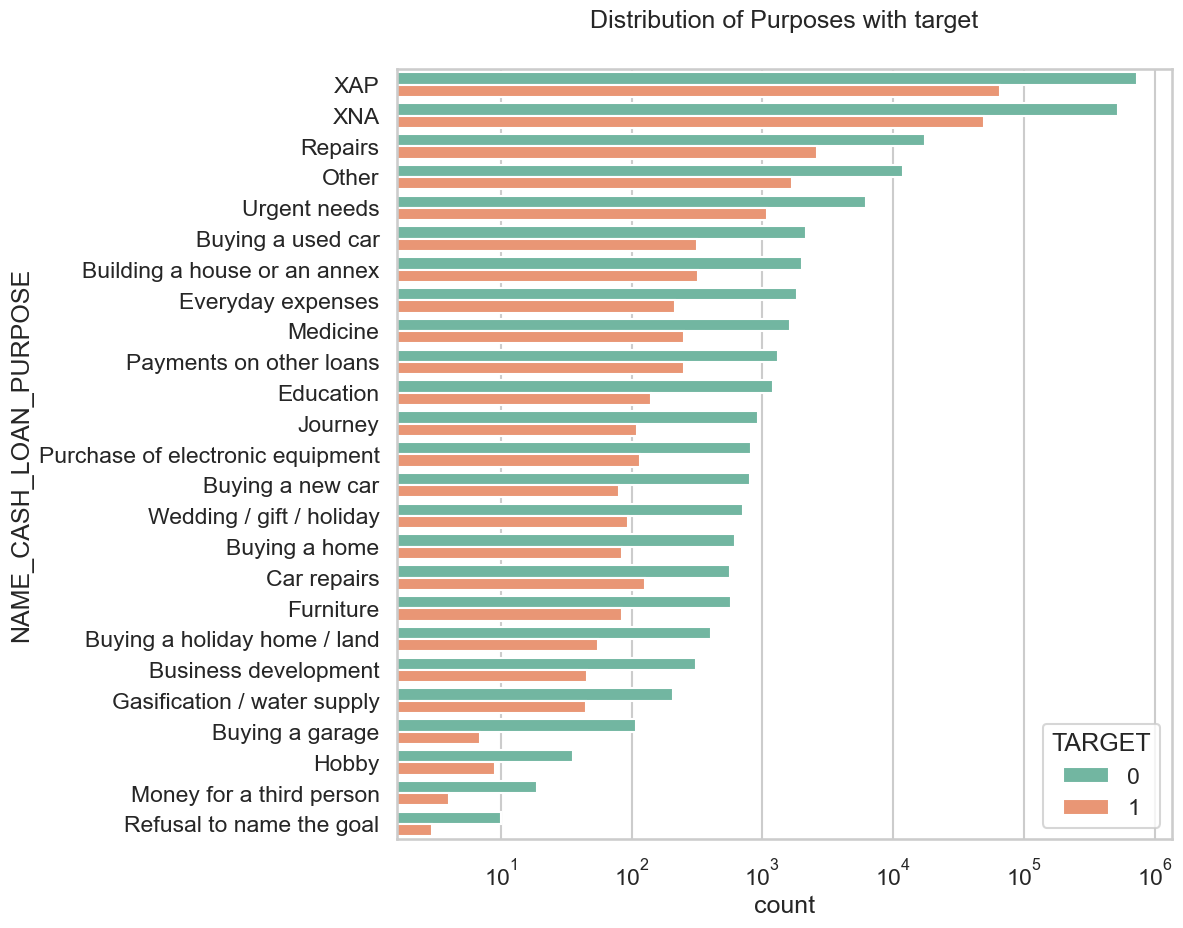

In [43]:
#distribution of purposes with target
plt.figure(figsize=(10,10))
plt.xscale("log")
sns.countplot(data=merge1, y="NAME_CASH_LOAN_PURPOSE",
             order=merge1["NAME_CASH_LOAN_PURPOSE"].value_counts().index, hue="TARGET", palette="Set2")
plt.title("Distribution of Purposes with target")

**Insights:**
1. From above graph we can conclude that target0 from repairs are facing difficulities on time.